# Start


In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from typing import Optional
import statsmodels.api as sm


file_path: str = "../dataset"
files: tuple[str, ...] = ("connections", "devices", "processes", "profiles")

dataset: dict[str, pd.DataFrame] = {}
for file in files:
    dataset[file] = pd.read_csv(f"{file_path}/{file}.csv", sep="\t")

-   importing the necessary libraries
-   declaring the variables


# A.)


### Connections description


In [183]:
dataset["connections"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15108 entries, 0 to 15107
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15108 non-null  object 
 1   imei               15108 non-null  int64  
 2   mwra               15108 non-null  float64
 3   c.dogalize         15108 non-null  float64
 4   c.android.gm       15108 non-null  float64
 5   c.android.youtube  15108 non-null  float64
 6   c.android.chrome   15108 non-null  float64
 7   c.katana           15108 non-null  float64
 8   c.raider           15108 non-null  float64
 9   c.android.vending  15108 non-null  float64
 10  c.UCMobile.x86     15108 non-null  float64
 11  c.updateassist     15108 non-null  float64
 12  c.UCMobile.intl    15108 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


-   Total Entries: 15,108
-   Total Columns: 13
-   Column Types:
-   11 columns of type float64
-   1 column of type int64
-   1 column of type object
-   There are no missing values in this data


In [184]:
dataset["connections"]["ts"]

0        2018-05-05 10:00:00
1        2018-05-05 10:01:00
2        2018-05-05 10:02:00
3        2018-05-05 10:03:00
4        2018-05-05 10:04:00
                ...         
15103    2018-05-05 20:51:00
15104    2018-05-12 15:15:00
15105    2018-05-08 09:46:00
15106    2018-05-08 20:46:00
15107    2018-05-14 20:56:00
Name: ts, Length: 15108, dtype: object

-   The object column "ts" is date and time


In [185]:
dataset["connections"]["ts"] = pd.to_datetime(dataset["connections"].ts)

-   Cast the "ts" column to datetime


In [186]:
connection_summary = dataset["connections"].describe()
median = (
    dataset["connections"].select_dtypes(include=["float64", "int64"]).median()
)  # adding median to describe method output
connection_summary.loc["median"] = median

# dropping imei, as it has no meaning to make these statistics out of it
connection_summary.drop(columns=["imei"], inplace=True)
connection_summary

,ts,mwra,c.dogalize,c.android.gm,c.android.youtube,c.android.chrome,c.katana,c.raider,c.android.vending,c.UCMobile.x86,c.updateassist,c.UCMobile.intl
count,15108,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000
mean,2018-05-10 14:25:02.581413888,0.625563,10.309496,10.928002,12.141882,10.933567,10.416465,48.846209,49.482347,49.685602,49.822994,49.805628
min,2018-05-05 10:00:00,0.000000,0.642300,2.587630,2.348110,2.655890,1.165660,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-05-08 00:16:45,0.000000,8.434330,8.943805,10.934585,8.965822,8.538965,39.977420,24.570853,24.731063,24.532995,24.735187
50%,2018-05-10 14:23:30,1.000000,10.154350,10.844220,12.375635,10.780055,10.263805,48.962015,49.269510,49.300740,49.852925,49.520235
75%,2018-05-13 04:31:15,1.000000,12.049473,12.850918,13.642702,12.806403,12.192747,57.737270,74.651803,74.873525,75.301215,74.849797
max,2018-05-15 18:48:00,1.000000,20.212930,22.004980,19.587410,21.092210,19.919510,100.000000,100.000000,100.000000,100.000000,100.000000
std,NaN,0.483993,2.626325,2.696930,2.225872,2.652465,2.626934,13.031848,28.905578,28.962924,29.030406,28.843199
median,NaN,1.000000,10.154350,10.844220,12.375635,10.780055,10.263805,48.962015,49.269510,49.300740,49.852925,49.520235


-   From these tables above we can see imei is a long integer and looks like an ID, if we look at processes table, we can also see same values indicating this could be an Id of device.
-   Another assumption we can make is that columns specifying a connection type (columns starting with c. such as c.android.youtube) have values ranging from 0 to 100, this could indicate that it is a percentage amount of time that the connection was established.


-   First few rows might indicate that the data was sample in a 1 minute interval.
-   Let's look at it closer.


In [187]:
dataset["connections"].sort_values(by="ts", ascending=True)["ts"]

0       2018-05-05 10:00:00
1       2018-05-05 10:01:00
2       2018-05-05 10:02:00
3       2018-05-05 10:03:00
4       2018-05-05 10:04:00
                ...        
14924   2018-05-15 18:44:00
14925   2018-05-15 18:45:00
14926   2018-05-15 18:46:00
14927   2018-05-15 18:47:00
14928   2018-05-15 18:48:00
Name: ts, Length: 15108, dtype: datetime64[ns]

-   Now we see it looks like samples are in a 1 minute interval.
-   Let's go further.


In [188]:
times = dataset["connections"].sort_values(by="ts")["ts"]
times = pd.to_datetime(times)

previous_time: Optional[pd.Series] = None

same_times: int = 0
non_minute_differences: int = 0


for current_time in times:
    if previous_time is None:
        previous_time = current_time
        continue

    if (current_time - previous_time).seconds == 0:
        same_times += 1

    elif (current_time - previous_time).seconds != 60:
        non_minute_differences += 1

    previous_time = current_time

print(f"Non minute differences: {non_minute_differences}")
print(f"Same times: {same_times}")

Non minute differences: 0
Same times: 179


-   From this we can see, that there are data every minute, sometimes more than once at the same time.


In [189]:
times = (
    dataset["connections"]
    .groupby(by="imei")[["imei", "ts"]]
    .apply(lambda val: val.sort_values(by="ts", ascending=True))
    .reset_index(drop=True)
)
times

,imei,ts
0,359043379931766007,2018-05-05 11:14:00
1,359043379931766007,2018-05-05 15:58:00
2,359043379931766007,2018-05-05 19:33:00
3,359043379931766007,2018-05-05 19:33:00
4,359043379931766007,2018-05-06 01:55:00
...,...,...
15103,8630330696303482493,2018-05-14 12:20:00
15104,8630330696303482493,2018-05-14 23:36:00
15105,8630330696303482493,2018-05-14 23:47:00
15106,8630330696303482493,2018-05-15 07:50:00


-   If we assume that columns starting with "c." are representing percentage amount of time being active during a time window, we need to group them by device serial number (imei) and then look at the time difference.


In [190]:
dataset["connections"]["mwra"].value_counts()

mwra
1.0    9451
0.0    5657
Name: count, dtype: int64

-   mwra is (Malware-related-activity)
-   In data there are only values 1.0 and 0.0 indicating if there was a malware activity in specific time frame.


### Devices description


In [191]:
dataset["devices"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2929 entries, 0 to 2928
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2929 non-null   float64
 1   longitude   2929 non-null   float64
 2   store_name  2929 non-null   object 
 3   code        2929 non-null   object 
 4   location    2929 non-null   object 
 5   imei        2929 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 137.4+ KB


In [192]:
devices_summary = dataset["devices"].describe()
median = (
    dataset["devices"].select_dtypes(include=["float64", "int64"]).median()
)  # adding median to describe method output
devices_summary.loc["median"] = median

# dropping imei, as it has no meaning to make these statistics out of it
devices_summary.drop(columns=["imei"], inplace=True)
devices_summary

,latitude,longitude
count,2929.000000,2929.000000
mean,29.279310,11.548748
std,22.929049,73.811177
min,-54.800000,-156.474320
25%,15.460630,-59.133160
50%,36.192780,9.476290
75%,46.083330,73.000000
max,68.798330,178.004170
median,36.192780,9.476290


In [193]:
dataset["devices"].head()

,latitude,longitude,store_name,code,location,imei
0,48.21644,9.02596,Albstadt,DE,Europe/Berlin,863033069630348990
1,12.74409,-8.07257,Kati,ML,Africa/Bamako,3590433799317661677
2,7.83389,-72.47417,Villa del Rosario,CO,America/Bogota,3590433799317661990
3,12.37169,123.62494,Masbate,PH,Asia/Manila,3590433799317661172
4,39.33427,-76.43941,Middle River,US,America/New_York,863033069630348073


-   "store_name" object is a string
-   "code" is string, holding code for state
-   "location" is a string, containing continent and city


### Processes description


In [194]:
dataset["processes"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15108 entries, 0 to 15107
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ts                          15108 non-null  object 
 1   imei                        15108 non-null  int64  
 2   mwra                        15108 non-null  float64
 3   p.android.packageinstaller  15108 non-null  float64
 4   p.android.settings          15108 non-null  float64
 5   p.android.documentsui       15108 non-null  float64
 6   p.android.chrome            15108 non-null  float64
 7   p.android.gm                15108 non-null  float64
 8   p.system                    15108 non-null  float64
 9   p.android.externalstorage   15108 non-null  float64
 10  p.android.vending           15108 non-null  float64
 11  p.process.gapps             15108 non-null  float64
 12  p.google                    15108 non-null  float64
 13  p.browser.provider          151

In [195]:
dataset["processes"]["ts"] = pd.to_datetime(dataset["processes"].ts)

In [196]:
processes_summary = dataset["processes"].describe()
median = (
    dataset["processes"].select_dtypes(include=["float64", "int64"]).median()
)  # adding median to describe method output
processes_summary.loc["median"] = median

# dropping imei, as it has no meaning to make these statistics out of it
processes_summary.drop(columns=["imei"], inplace=True)
processes_summary

,ts,mwra,p.android.packageinstaller,p.android.settings,p.android.documentsui,p.android.chrome,p.android.gm,p.system,p.android.externalstorage,p.android.vending,...,p.browser.provider,p.android.defcontainer,p.dogalize,p.olauncher,p.simulator,p.inputmethod.latin,p.android.gms,p.notifier,p.katana,p.gms.persistent
count,15108,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,...,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000
mean,2018-05-10 14:25:02.581413888,0.625563,11.572954,11.499864,10.310165,9.790817,12.771425,10.397043,11.576398,0.062140,...,50.072203,47.326426,50.037140,49.640124,50.022306,50.260806,50.272805,49.751673,49.852339,49.573461
min,2018-05-05 10:00:00,0.000000,2.487240,1.570430,2.279980,0.000000,5.552490,0.616400,2.292350,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-05-08 00:16:45,0.000000,9.739860,9.656940,8.417333,8.122188,11.547503,8.453595,9.704448,0.000240,...,41.272058,38.443713,25.007917,24.370213,24.879258,25.193368,25.569652,25.352768,24.522633,24.168370
50%,2018-05-10 14:23:30,1.000000,11.703395,11.619575,10.138660,9.641190,12.781690,10.351115,11.693555,0.001460,...,49.965620,47.353845,50.400705,49.551330,50.338015,50.040285,50.465125,49.859050,49.514105,49.986190
75%,2018-05-13 04:31:15,1.000000,13.443035,13.414413,12.119515,11.364935,14.001280,12.327390,13.534700,0.010613,...,58.825585,56.251165,75.002775,74.764725,74.949060,75.316412,75.275442,74.062057,75.035590,74.764915
max,2018-05-15 18:48:00,1.000000,20.415500,20.927500,20.122050,19.855360,19.625710,19.216320,21.071240,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
std,NaN,0.483993,2.636035,2.679572,2.648527,2.436871,1.816167,2.664877,2.713959,1.030622,...,13.310724,13.104973,28.833214,28.910236,28.957691,28.843929,28.820311,28.685114,28.967083,29.068352
median,NaN,1.000000,11.703395,11.619575,10.138660,9.641190,12.781690,10.351115,11.693555,0.001460,...,49.965620,47.353845,50.400705,49.551330,50.338015,50.040285,50.465125,49.859050,49.514105,49.986190


In [197]:
dataset["processes"].head()

,ts,imei,mwra,p.android.packageinstaller,p.android.settings,p.android.documentsui,p.android.chrome,p.android.gm,p.system,p.android.externalstorage,...,p.browser.provider,p.android.defcontainer,p.dogalize,p.olauncher,p.simulator,p.inputmethod.latin,p.android.gms,p.notifier,p.katana,p.gms.persistent
0,2018-05-05 10:00:00,3590433799317661693,1.0,9.23642,14.64737,12.28429,8.10855,11.56273,9.81747,7.96281,...,35.91940,24.95922,21.17604,80.95317,64.67547,55.80378,82.99368,96.45875,95.47350,18.60413
1,2018-05-05 10:01:00,863033069630348362,1.0,12.12539,13.31378,8.53914,8.99158,10.84797,10.73896,12.39776,...,59.79664,48.67044,40.08113,25.00209,86.68513,4.17599,65.28470,11.04057,72.81380,55.76611
2,2018-05-05 10:02:00,863033069630348040,1.0,11.93971,13.62370,13.71940,10.16446,14.61026,10.14790,10.00803,...,37.66953,51.76377,87.50645,8.40823,32.66810,96.13825,4.88761,29.88836,82.48309,18.89299
3,2018-05-05 10:03:00,8630330696303482121,0.0,11.75678,5.40945,10.37504,12.96885,15.71257,13.59185,14.10555,...,47.54273,51.31861,40.91248,46.38488,35.03554,24.37016,69.40371,27.45343,53.48129,80.62817
4,2018-05-05 10:04:00,3590433799317661495,0.0,13.29218,9.88140,10.48243,12.30196,10.07931,14.95220,12.61291,...,44.97460,35.66277,43.71764,14.70324,73.82801,24.01651,55.68464,29.72480,93.90266,79.73910


### Profiles description


In [198]:
dataset["profiles"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   username      2571 non-null   object
 1   address       2185 non-null   object
 2   name          2571 non-null   object
 3   user_id       2571 non-null   int64 
 4   job           771 non-null    object
 5   ssn           2571 non-null   object
 6   company       2571 non-null   object
 7   imei          2571 non-null   int64 
 8   registration  2571 non-null   object
 9   residence     900 non-null    object
 10  mail          2571 non-null   object
 11  birthdate     1414 non-null   object
dtypes: int64(2), object(10)
memory usage: 241.2+ KB


In [199]:
profiles_summary = dataset["profiles"].describe()
median = (
    dataset["profiles"].select_dtypes(include=["float64", "int64"]).median()
)  # adding median to describe method output
profiles_summary.loc["median"] = median

# dropping imei, as it has no meaning to make these statistics out of it
profiles_summary.drop(columns=["imei"], inplace=True)
profiles_summary

,user_id
count,2571.000000
mean,1294.560482
std,734.696063
min,0.000000
25%,660.500000
50%,1280.000000
75%,1938.000000
max,2570.000000
median,1280.000000


In [200]:
dataset["profiles"].head()

,username,address,name,user_id,job,ssn,company,imei,registration,residence,mail,birthdate
0,nancywagner,Unit 3496 Box 9846\r\nDPO AE 23667,Shelly Thomas,1713,NaN,568-30-2539,"Miller, Kirby and Davis",863033069630348636,02 Aug 2018,NaN,brandonsmith@hotmail.com,2004-12-08
1,millerdakota,"677 Jay Vista Suite 015\r\nBrownhaven, LA 18432",Amy Horn,1886,NaN,395-74-2254,"Gonzalez, Andrade and Robinson",359043379931766007,18 Feb 2022,NaN,keithgibbs@gmail.com,1931-09-11
2,meyerabigail,"3746 Baldwin Estate Suite 335\r\nWest Travis, ...",Leah Campbell,184,NaN,848-91-2310,"Boyle, Taylor and Sampson",8630330696303481487,2021/08/17,NaN,steve72@yahoo.com,1931-11-04
3,timothyhart,"8748 Villarreal Lights\r\nWest Michaelfurt, WA...",Joseph Miller,920,Fast food restaurant manager,247-95-0332,Smith-Rodriguez,8630330696303481156,2023-10-24,"864 Jared Overpass Suite 869\r\nPort Amanda, W...",mfletcher@hotmail.com,1955-01-15
4,jenniferwilliams,"499 Michael Flat\r\nJesseview, HI 05817",Kimberly Williams,2557,NaN,162-02-9998,Ramsey-Fernandez,8630330696303481453,2018-03-19,NaN,ryanmartinez@yahoo.com,1966-09-30


In [201]:
null_values = {file: data.isnull().sum() for file, data in dataset.items()}
for file, nulls in null_values.items():
    if nulls.sum() == 0:
        continue
    print(f"Null values in {file} dataset:")
    print(nulls)
    print("\n")

Null values in profiles dataset:
username           0
address          386
name               0
user_id            0
job             1800
ssn                0
company            0
imei               0
registration       0
residence       1671
mail               0
birthdate       1157
dtype: int64




# B.)


### MWRA


-   First we look at the most important column "mwra" and look at it more in depth.


In [202]:
dataset["connections"]["mwra"].value_counts(normalize=True) * 100

mwra
1.0    62.556262
0.0    37.443738
Name: proportion, dtype: float64

-   In "connections" we can see that positive mwra is ~62%, indicating that there are more positive cases and therefore in future when we put it into our model might falsely evaluate some connections. I would say the closer we are to 50/50 the better.


In [203]:
dataset["processes"]["mwra"].value_counts(normalize=True) * 100

mwra
1.0    62.556262
0.0    37.443738
Name: proportion, dtype: float64

-   "mwra" is the same for "processes" as it is for "connections"


## Connections


### Defining the variables


In [204]:
chrome_data = dataset["connections"]["c.android.chrome"]
chrome_mean = chrome_data.mean()
chrome_std = chrome_data.std()

dogalize_data = dataset["connections"]["c.dogalize"]
dogalize_mean = dogalize_data.mean()
dogalize_std = dogalize_data.std()

gm_data = dataset["connections"]["c.android.gm"]
gm_mean = gm_data.mean()
gm_std = gm_data.std()

youtube_data = dataset["connections"]["c.android.youtube"]
youtube_mean = youtube_data.mean()
youtube_std = youtube_data.std()

katana_data = dataset["connections"]["c.katana"]
katana_mean = katana_data.mean()
katana_std = katana_data.std()

raider_data = dataset["connections"]["c.raider"]
raider_mean = raider_data.mean()
raider_std = raider_data.std()

vending_data = dataset["connections"]["c.android.vending"]
vending_mean = vending_data.mean()
vending_std = vending_data.std()

x86_data = dataset["connections"]["c.UCMobile.x86"]
x86_mean = x86_data.mean()
x86_std = x86_data.std()


updateassist_data = dataset["connections"]["c.updateassist"]
updateassist_mean = updateassist_data.mean()
updateassist_std = updateassist_data.std()

intl_data = dataset["connections"]["c.UCMobile.intl"]
intl_mean = intl_data.mean()
intl_std = intl_data.std()

all_str_connections: list[str] = ["c.android.chrome",
                   "c.dogalize",
                   "c.android.gm",
                   "c.android.youtube",
                   "c.katana",
                   "c.raider",
                   "c.android.vending",
                   "c.UCMobile.x86",
                   "c.updateassist",
                   "c.UCMobile.intl"
                   ]
all_data_connections: list[pd.Series] = [chrome_data,
                                         dogalize_data,
                                         gm_data,
                                         youtube_data,
                                         katana_data,
                                         raider_data,
                                         vending_data,
                                         x86_data,
                                         updateassist_data,
                                         intl_data
                                         ]

all_means_connections: list[float] = [chrome_mean,
                                      dogalize_mean,
                                      gm_mean,
                                      youtube_mean,
                                      katana_mean,
                                      raider_mean,
                                      vending_mean,
                                      x86_mean,
                                      updateassist_mean,
                                      intl_mean
                                      ]

all_std_connections: list[float] = [chrome_std,
                                    dogalize_std,
                                    gm_std,
                                    youtube_std,
                                    katana_std,
                                    raider_std,
                                    vending_std,
                                    x86_std,
                                    updateassist_std,
                                    intl_std
                                    ]

### Measure of dispersion


In [205]:
df = dataset["connections"].iloc[:, 3:].describe()
df.loc["full_range"] = df.loc["max"] - df.loc["min"]
df.loc["interquartile_range"] = df.loc["75%"] - df.loc["25%"]
df

,c.dogalize,c.android.gm,c.android.youtube,c.android.chrome,c.katana,c.raider,c.android.vending,c.UCMobile.x86,c.updateassist,c.UCMobile.intl
count,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000
mean,10.309496,10.928002,12.141882,10.933567,10.416465,48.846209,49.482347,49.685602,49.822994,49.805628
std,2.626325,2.696930,2.225872,2.652465,2.626934,13.031848,28.905578,28.962924,29.030406,28.843199
min,0.642300,2.587630,2.348110,2.655890,1.165660,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.434330,8.943805,10.934585,8.965822,8.538965,39.977420,24.570853,24.731063,24.532995,24.735187
50%,10.154350,10.844220,12.375635,10.780055,10.263805,48.962015,49.269510,49.300740,49.852925,49.520235
75%,12.049473,12.850918,13.642702,12.806403,12.192747,57.737270,74.651803,74.873525,75.301215,74.849797
max,20.212930,22.004980,19.587410,21.092210,19.919510,100.000000,100.000000,100.000000,100.000000,100.000000
full_range,19.570630,19.417350,17.239300,18.436320,18.753850,100.000000,100.000000,100.000000,100.000000,100.000000
interquartile_range,3.615143,3.907113,2.708117,3.840580,3.653783,17.759850,50.080950,50.142463,50.768220,50.114610


### Measure of center


In [206]:
apps = all_str_connections

means = all_means_connections

medians = [
    chrome_data.median(),
    dogalize_data.median(),
    gm_data.median(),
    youtube_data.median(),
    katana_data.median(),
    raider_data.median(),
    vending_data.median(),
    x86_data.median(),
    updateassist_data.median(),
    intl_data.median(),
]

max_values = []
most_occurring_values = []

value_counts = chrome_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = dogalize_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = gm_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = youtube_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = katana_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = raider_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = vending_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = x86_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = updateassist_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())

value_counts = intl_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())

for i in range(len(most_occurring_values)):
    most_occurring_values[i] = most_occurring_values[i][:min(3, len(most_occurring_values[i]))]


data = {
    "connection": apps,
    "mean": means,
    "median": medians,
    "mode_count": max_values,
    "mode_values": most_occurring_values,
}

df = pd.DataFrame(data)
df

,connection,mean,median,mode_count,mode_values
0,c.android.chrome,10.933567,10.780055,3,"[15.09277, 13.96247, 12.66087]"
1,c.dogalize,10.309496,10.154350,3,"[8.4362, 8.08643, 10.34456]"
2,c.android.gm,10.928002,10.844220,3,"[7.37316, 9.99788, 9.46395]"
3,c.android.youtube,12.141882,12.375635,3,"[14.20878, 13.29313, 12.68658]"
4,c.katana,10.416465,10.263805,3,"[11.87016, 13.43679, 11.03079]"
5,c.raider,48.846209,48.962015,3,"[60.99804, 48.39264]"
6,c.android.vending,49.482347,49.269510,2,"[38.08731, 34.79229, 32.50178]"
7,c.UCMobile.x86,49.685602,49.300740,2,"[47.83628, 76.1005, 37.45813]"
8,c.updateassist,49.822994,49.852925,2,"[65.22365, 55.65401, 66.5042]"
9,c.UCMobile.intl,49.805628,49.520235,2,"[69.34231, 40.47904, 3.54383]"


### Measure of shape


In [207]:
def skewness_type(skew_value: float) -> str:
    if skew_value <= -1:
        return "Highly Negative Skew"
    
    elif skew_value <= -0.5:
        return "Moderately Negative Skew"
    
    elif skew_value <= 0.5:
        return "Approximately Symmetric"
    
    elif skew_value <= 1:
        return "Moderately Positive Skew"

    return "Highly Positive Skew"

In [208]:
def kurtosis_type(kurtosis_value: float) -> str:
    if kurtosis_value < -1:
        return "Negative Kurtosis"
    
    elif kurtosis_value < -0.5:
        return "Moderately Negative Kurtosis"
    
    elif kurtosis_value < 0.5:
        return "Approximately Normal Kurtosis"
    
    elif kurtosis_value < 1:
        return "Moderately Positive Kurtosis"

    return "Positive Kurtosis"


In [209]:
data = {
    "connection": all_str_connections,
    "skew": [
        stats.skew(chrome_data),
        stats.skew(dogalize_data),
        stats.skew(gm_data),
        stats.skew(youtube_data),
        stats.skew(katana_data),
        stats.skew(raider_data),
        stats.skew(vending_data),
        stats.skew(x86_data),
        stats.skew(updateassist_data),
        stats.skew(intl_data),
    ],
    "kurtosis": [
        stats.kurtosis(chrome_data),
        stats.kurtosis(dogalize_data),
        stats.kurtosis(gm_data),
        stats.kurtosis(youtube_data),
        stats.kurtosis(katana_data),
        stats.kurtosis(raider_data),
        stats.kurtosis(vending_data),
        stats.kurtosis(x86_data),
        stats.kurtosis(updateassist_data),
        stats.kurtosis(intl_data),
    ],
}

shape_df = pd.DataFrame(data)

shape_df["result skew"] = shape_df["skew"].apply(skewness_type)
shape_df["result kurtosis"] = shape_df["kurtosis"].apply(kurtosis_type)
shape_df.set_index("connection", inplace=True)
shape_df

,skew,kurtosis,result skew,result kurtosis
connection,,,,
c.android.chrome,0.202709,-0.402562,Approximately Symmetric,Approximately Normal Kurtosis
c.dogalize,0.238739,-0.157746,Approximately Symmetric,Approximately Normal Kurtosis
c.android.gm,0.145092,-0.284452,Approximately Symmetric,Approximately Normal Kurtosis
c.android.youtube,-0.617624,0.687939,Moderately Negative Skew,Moderately Positive Kurtosis
c.katana,0.210126,-0.189410,Approximately Symmetric,Approximately Normal Kurtosis
c.raider,-0.023362,-0.059577,Approximately Symmetric,Approximately Normal Kurtosis
c.android.vending,0.015750,-1.198576,Approximately Symmetric,Negative Kurtosis
c.UCMobile.x86,0.014363,-1.211366,Approximately Symmetric,Negative Kurtosis
c.updateassist,0.008036,-1.221742,Approximately Symmetric,Negative Kurtosis


### Histograms with KDE


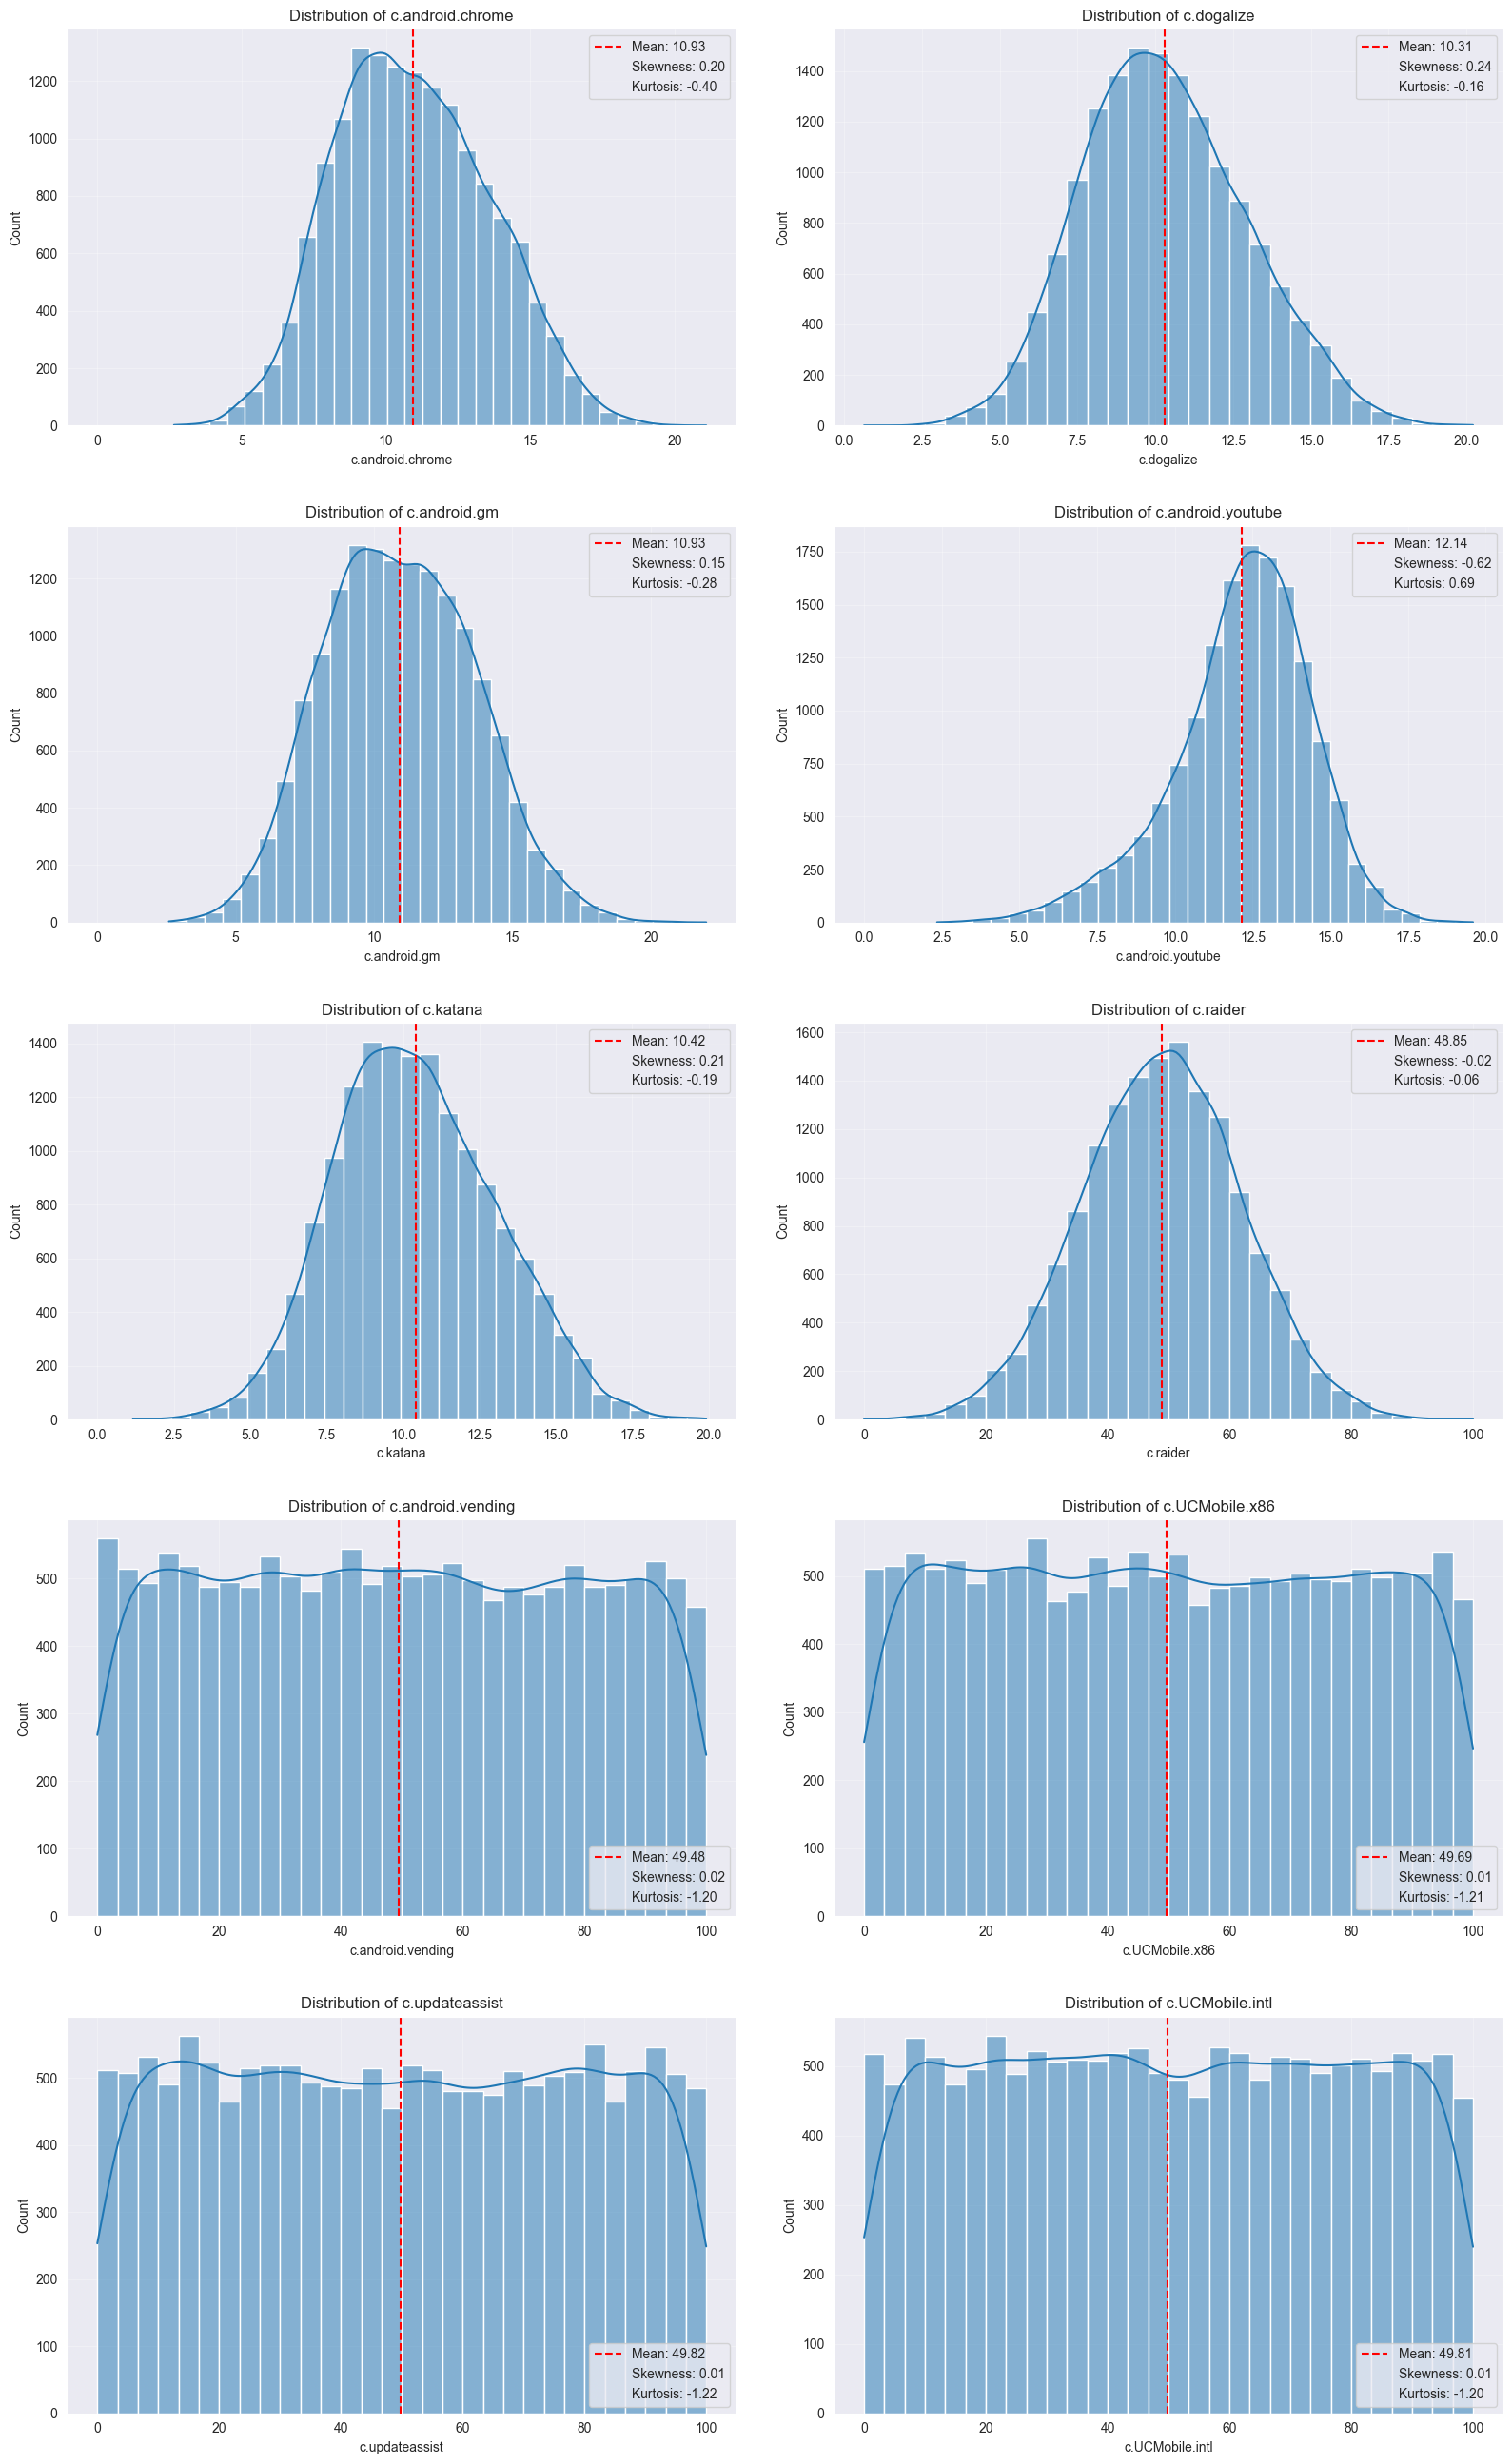

In [210]:
fig, axes = plt.subplots(5, 2, figsize=(16, 26))

'''
    Having all the data in a list, we can iterate over it and plot the histogram with KDE for each connection.
'''
for i in range(len(all_data_connections)):
    sns.histplot(all_data_connections[i], bins=30, kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].axvline(all_means_connections[i], color="r", linestyle="--", label=f"Mean: {all_means_connections[i]:.2f}")
    axes[i // 2, i % 2].axvline(linestyle="", label=f"Skewness: {shape_df.loc[all_str_connections[i]]['skew']:.2f}")
    axes[i // 2, i % 2].axvline(linestyle="", label=f"Kurtosis: {shape_df.loc[all_str_connections[i]]['kurtosis']:.2f}")
    axes[i // 2, i % 2].set_title(f"Distribution of {all_str_connections[i]}")
    axes[i // 2, i % 2].legend()
    axes[i // 2, i % 2].grid(True, alpha=0.3)

# Adjust the layout
plt.tight_layout(w_pad=3, h_pad=3)
plt.show()

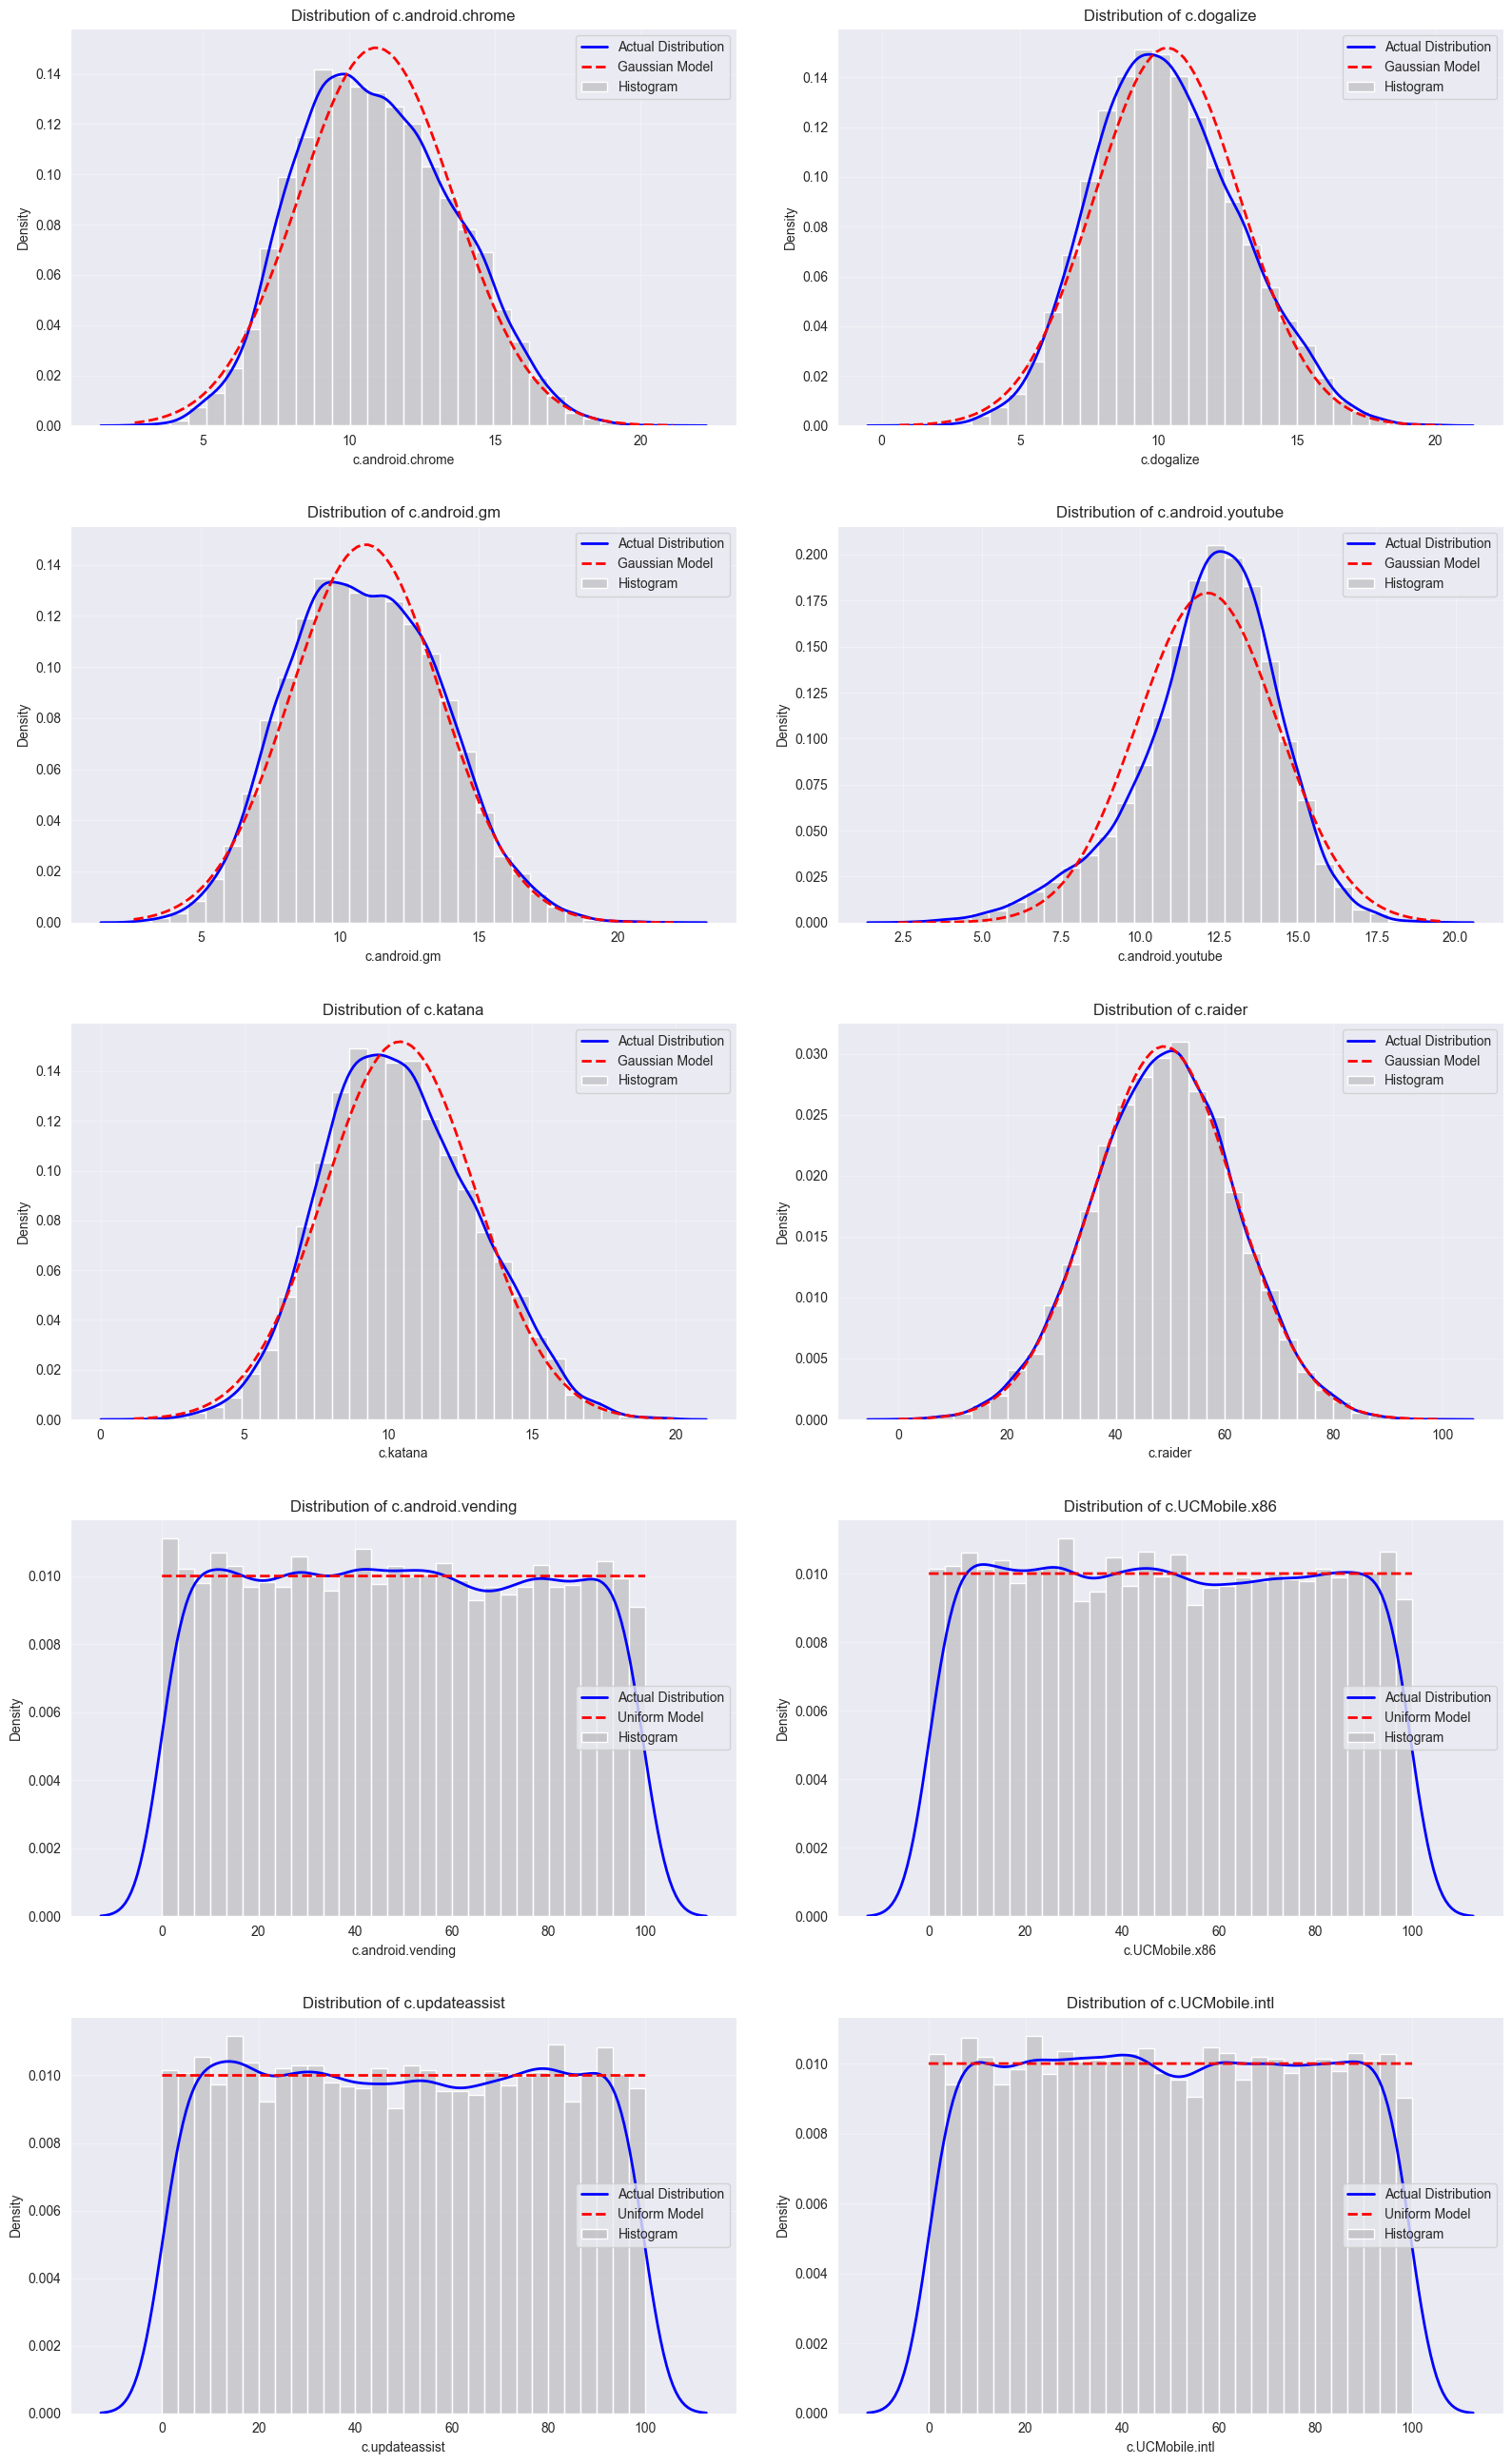

In [211]:
_, axes = plt.subplots(5, 2, figsize=(16, 26))

for i in range(len(all_data_connections)):
    sns.histplot(
    data=all_data_connections[i], bins=30, stat="density", alpha=0.3, color="gray", label="Histogram", ax=axes[i // 2, i % 2]
                )
    sns.kdeplot(data=all_data_connections[i], color="blue", label="Actual Distribution", linewidth=2, ax=axes[i // 2, i % 2])
    
    if i <= 5: # We know that first 6 connections are not uniform
        x = np.linspace(all_data_connections[i].min(), all_data_connections[i].max(), 100)
        gaussian = stats.norm.pdf(x, all_means_connections[i], all_std_connections[i])
        axes[i // 2, i % 2].plot(x, gaussian, color="red", linestyle="--", label="Gaussian Model", linewidth=2)
        
    
    else:
        a = all_data_connections[i].min()
        b = all_data_connections[i].max()
        x = np.linspace(a, b, all_data_connections[i].size)
        uniform_dist = stats.uniform(loc=a, scale=b - a)
        axes[i // 2, i % 2].plot(x, uniform_dist.pdf(x), color="red", linestyle="--", label="Uniform Model", linewidth=2)
        
    axes[i // 2, i % 2].set_title(f"Distribution of {all_str_connections[i]}")
    axes[i // 2, i % 2].legend()
    axes[i // 2, i % 2].grid(True, alpha=0.3)


# Adjust the layout
plt.tight_layout(w_pad=3, h_pad=3)
plt.show()

### Boxplots


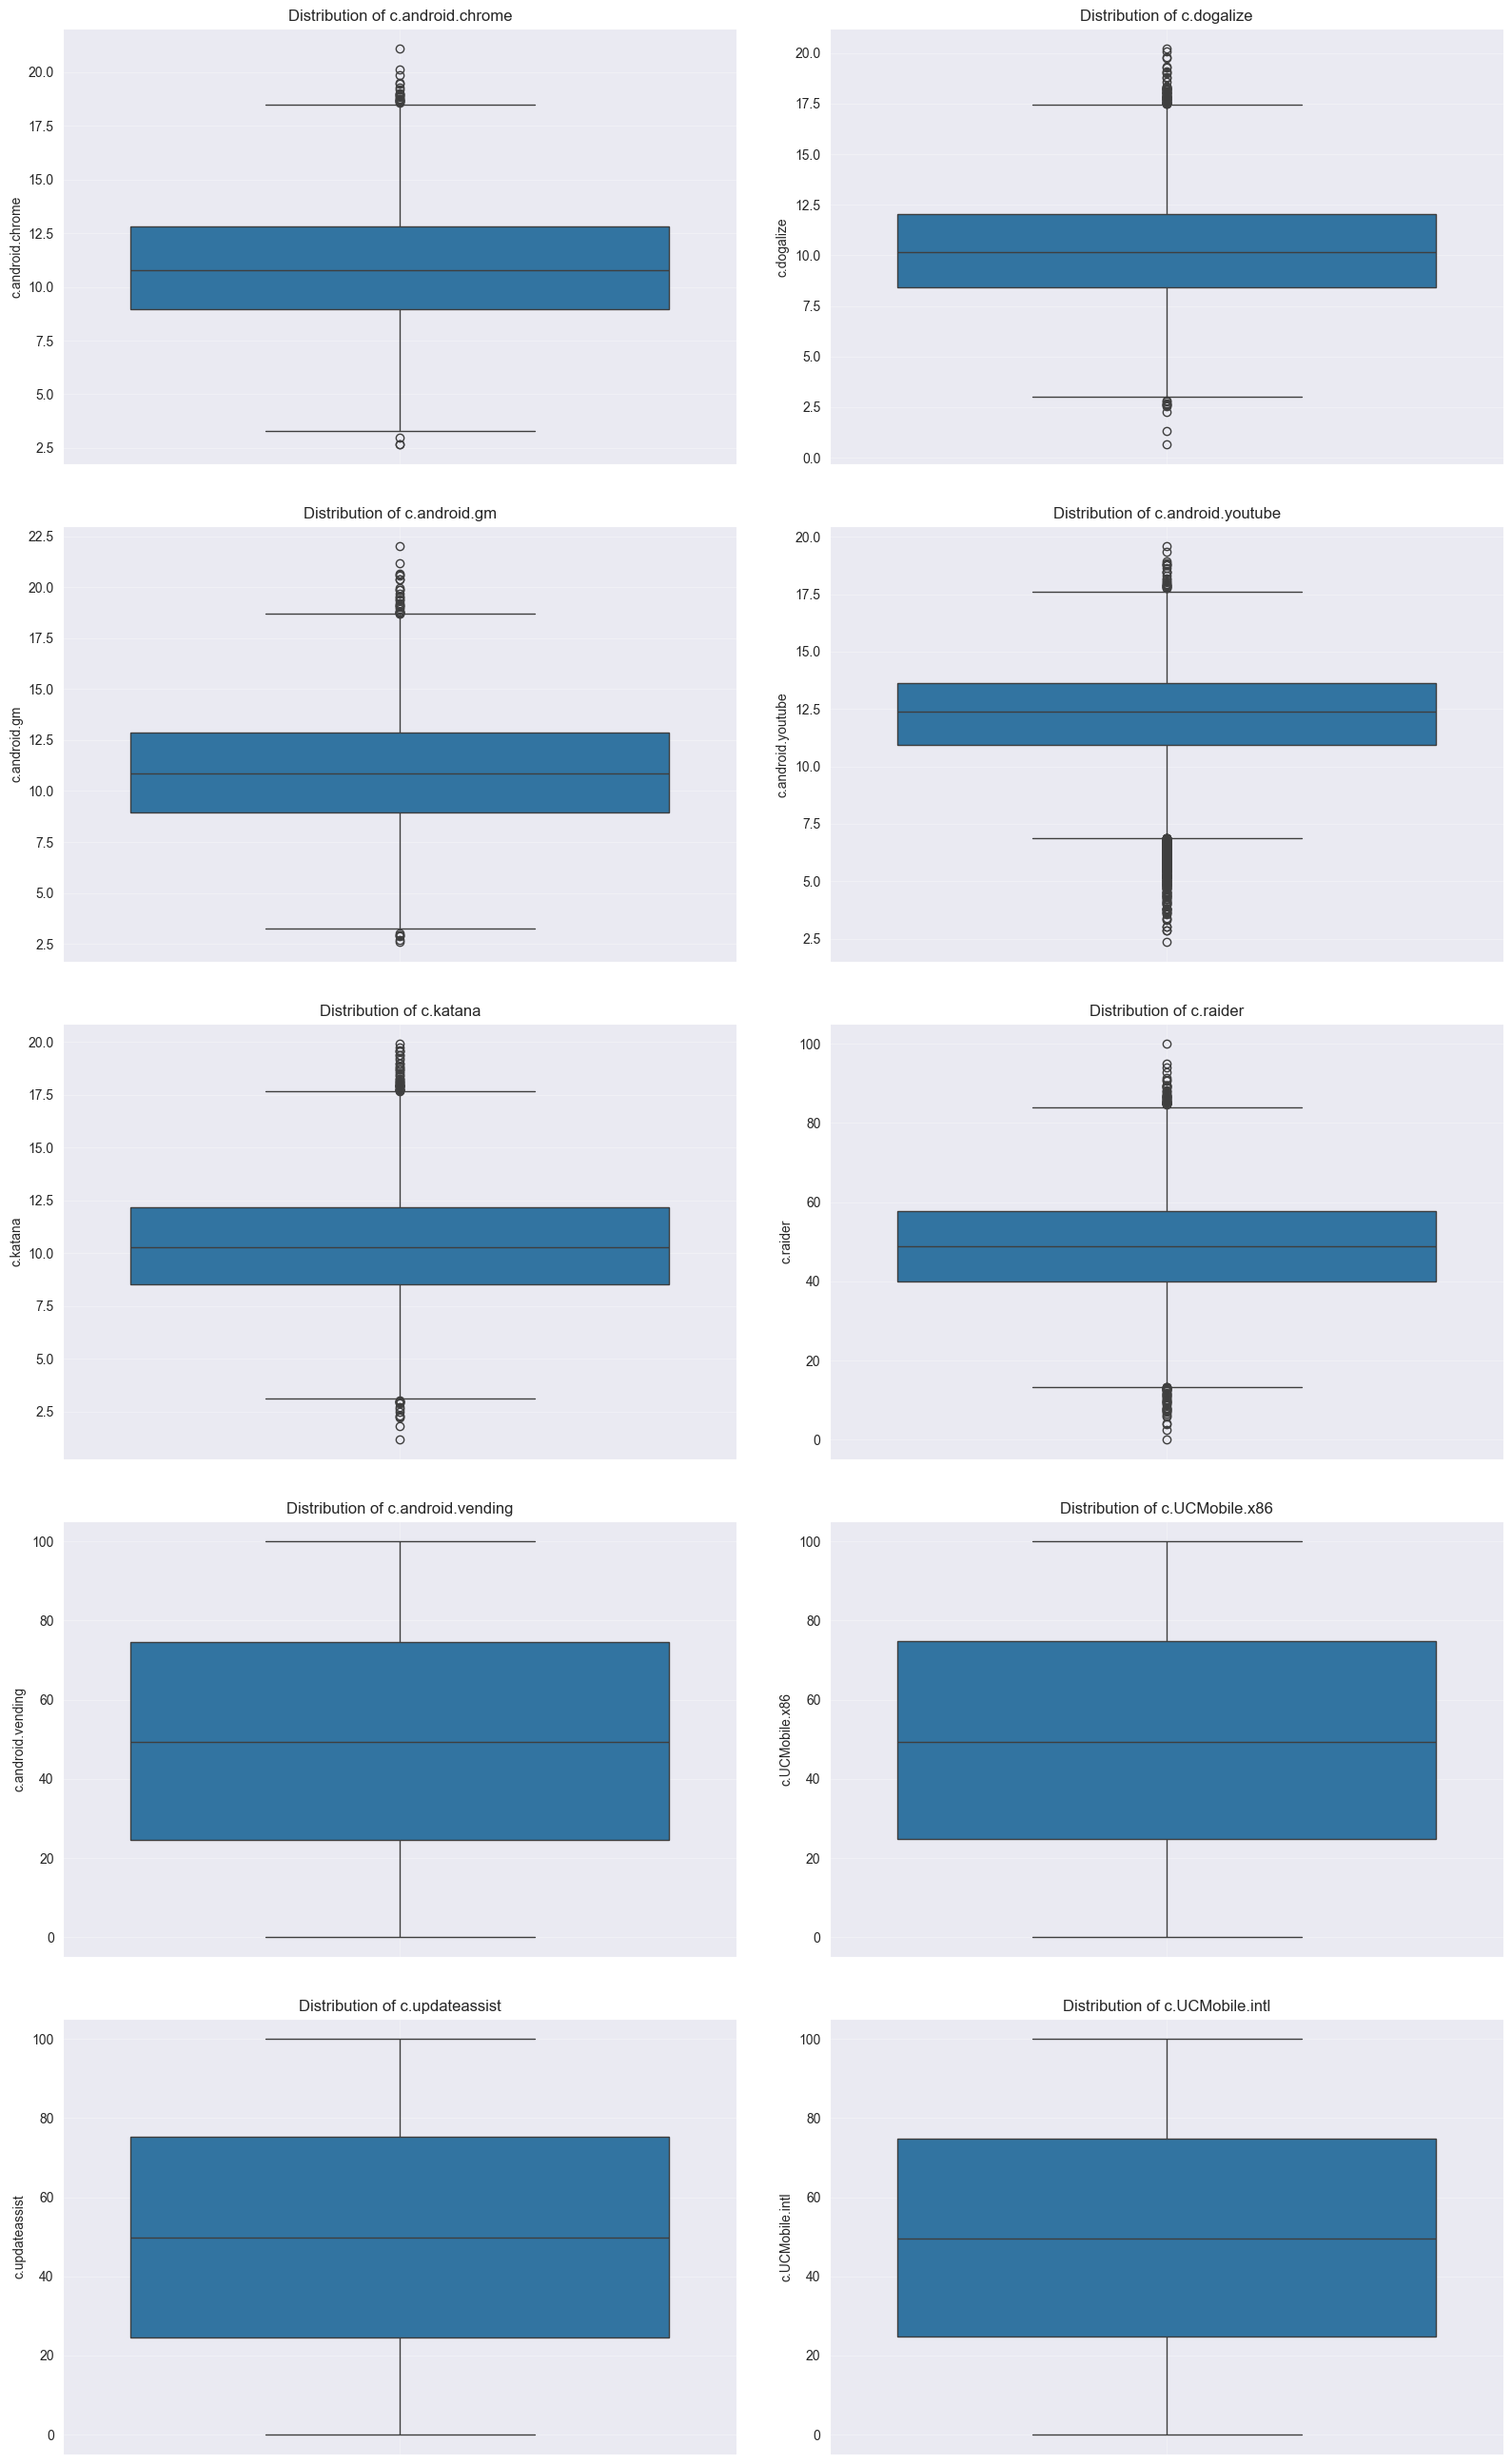

In [212]:
_, axes = plt.subplots(5, 2, figsize=(16, 26))

for i in range(len(all_data_connections)):
    sns.boxplot(all_data_connections[i], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Distribution of {all_str_connections[i]}")
    axes[i // 2, i % 2].grid(True, alpha=0.3)

# Adjust the layout
plt.tight_layout(w_pad=3, h_pad=3)
plt.show()

### Q-Q plots


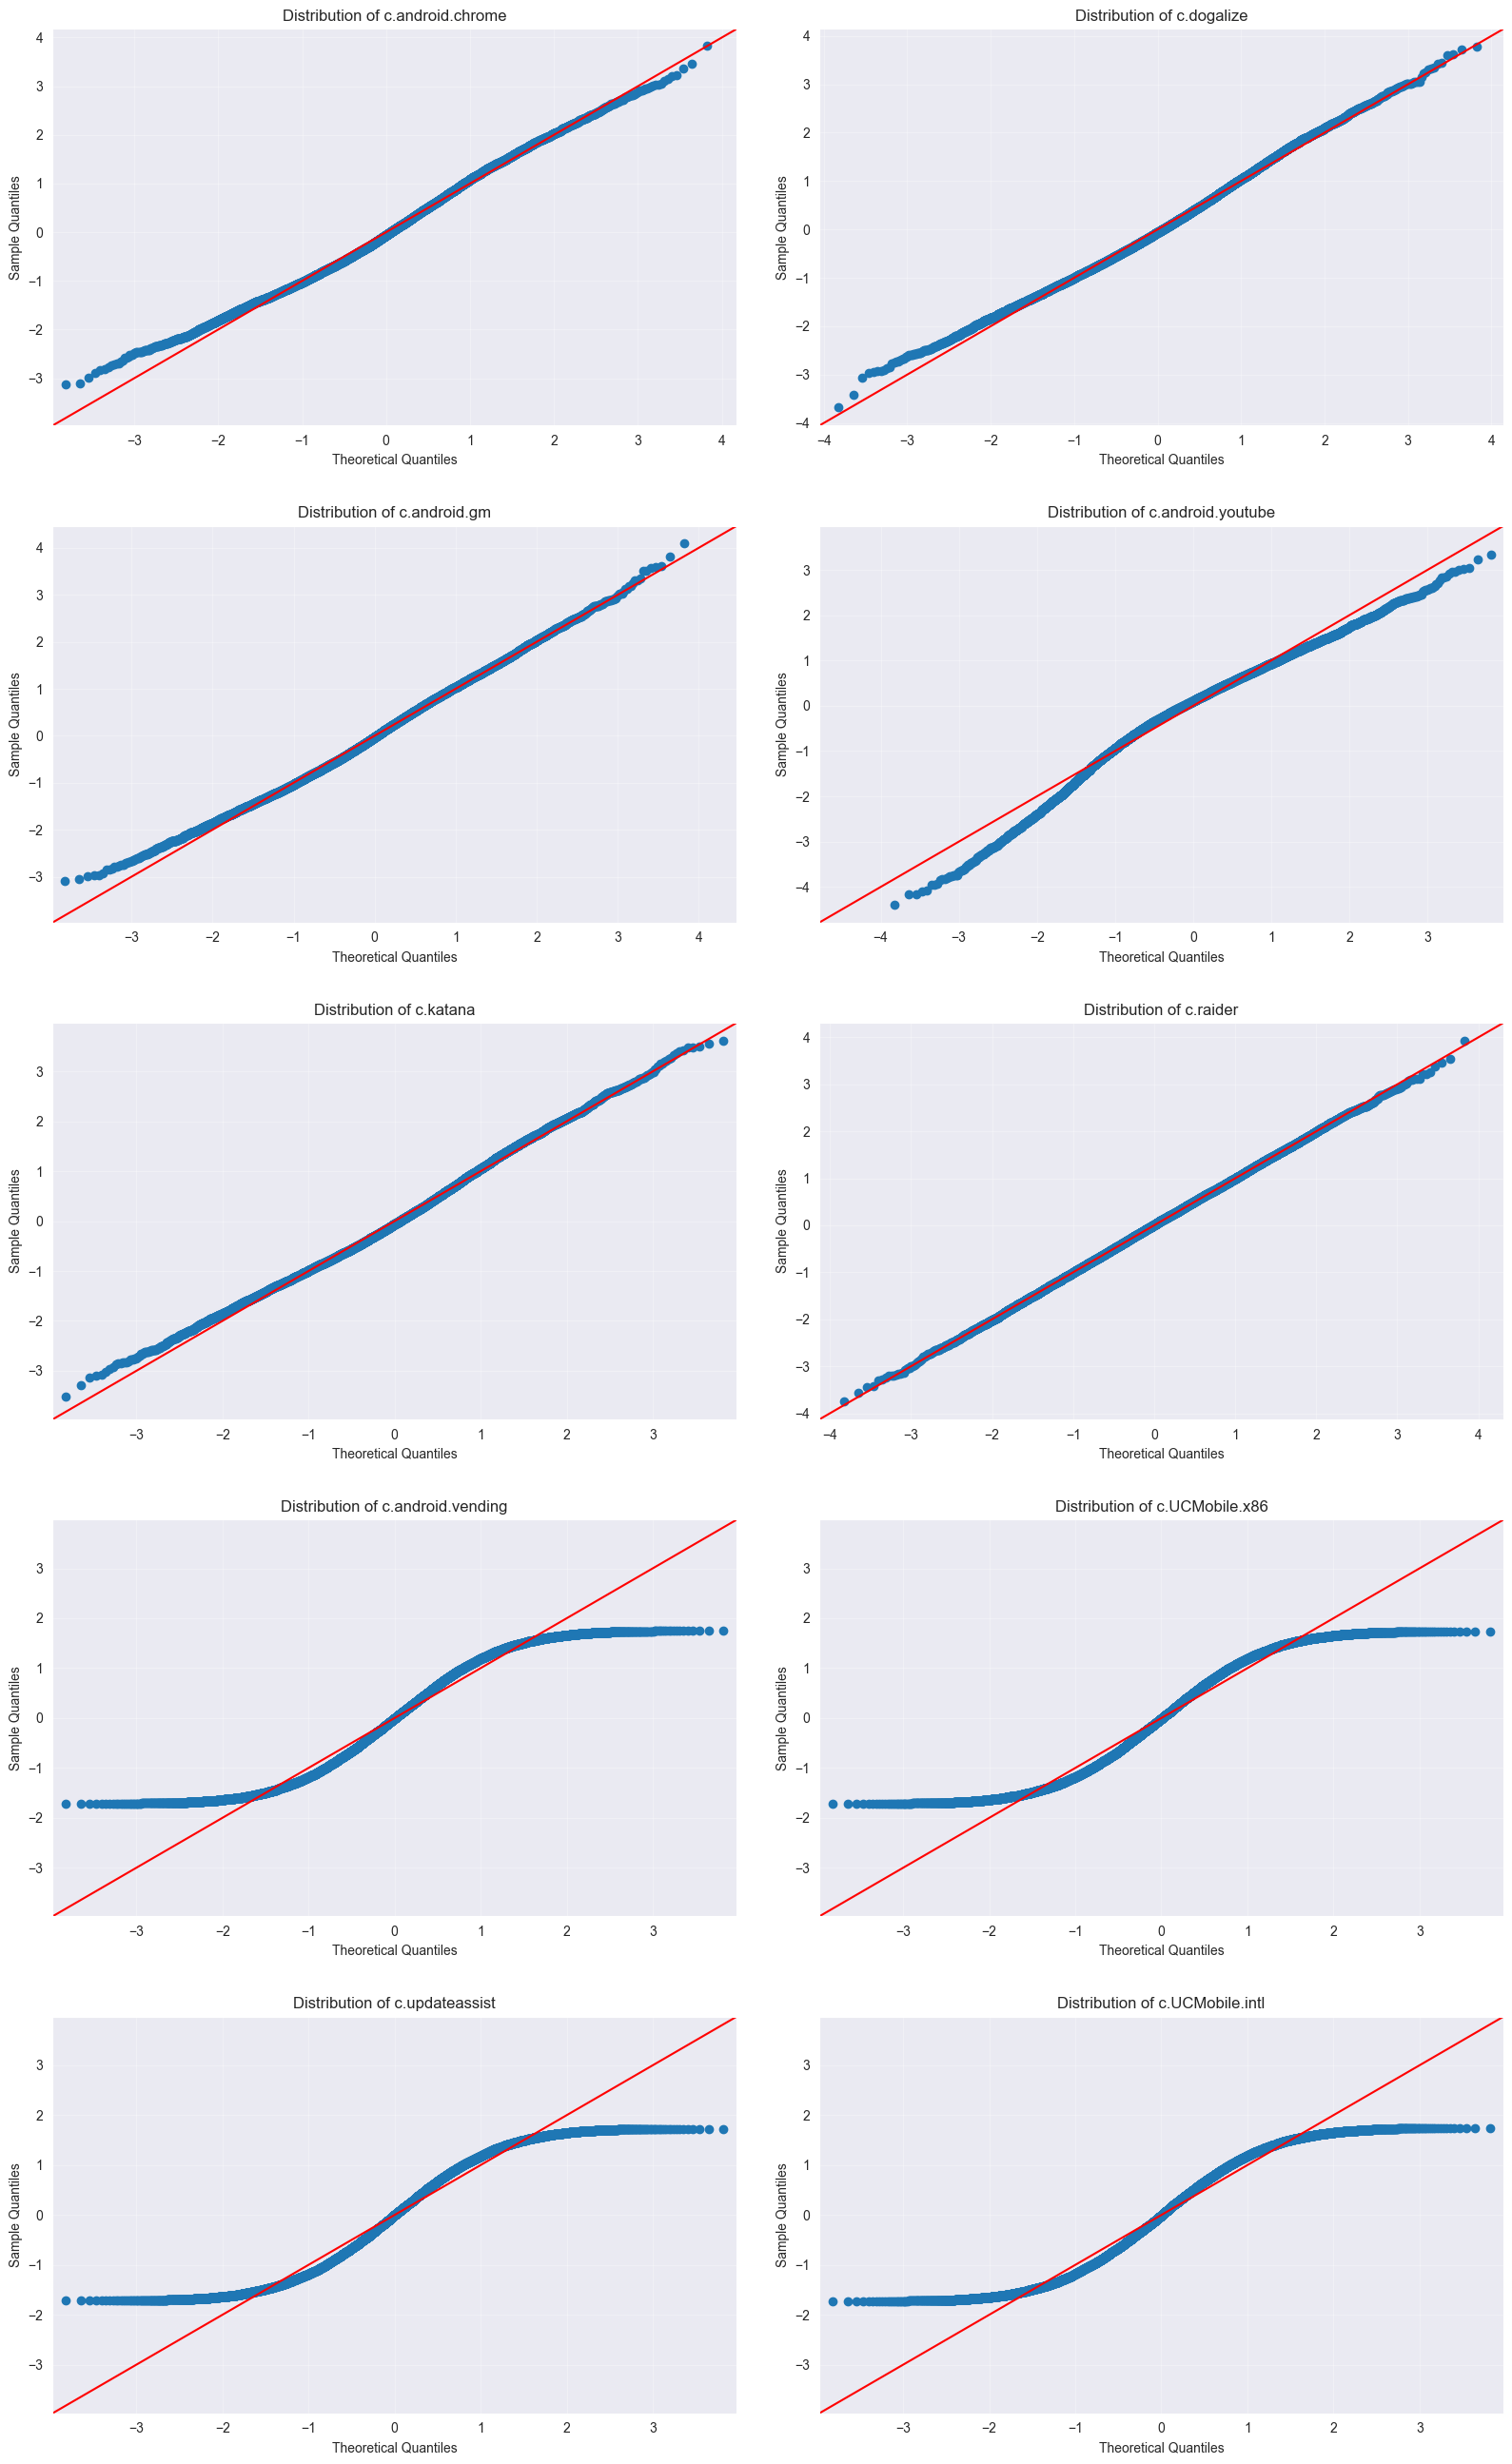

In [213]:
_, axes = plt.subplots(5, 2, figsize=(16, 26))

for i in range(len(all_data_connections)):
    sm.qqplot(all_data_connections[i], fit=True, line="45", ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Distribution of {all_str_connections[i]}")
    axes[i // 2, i % 2].grid(True, alpha=0.3)

# Adjust the layout
plt.tight_layout(w_pad=3, h_pad=3)
plt.show()

## Processes


### Defining the variables


In [214]:
chrome_data = dataset["processes"]["p.android.chrome"]
chrome_mean = chrome_data.mean()
chrome_std = chrome_data.std()

dogalize_data = dataset["processes"]["p.dogalize"]
dogalize_mean = dogalize_data.mean()
dogalize_std = dogalize_data.std()

katana_data = dataset["processes"]["p.katana"]
katana_mean = katana_data.mean()
katana_std = katana_data.std()

settings_data = dataset["processes"]["p.android.settings"]
settings_mean = settings_data.mean()
settings_std = settings_data.std()

system_data = dataset["processes"]["p.system"]
system_mean = system_data.mean()
system_std = system_data.std()

simulator_data = dataset["processes"]["p.simulator"]
simulator_mean = simulator_data.mean()
simulator_std = simulator_data.std()

all_str_processes: list[str] = ["p.android.chrome",
                                "p.dogalize",
                                "p.katana",
                                "p.android.settings",
                                "p.system",
                                "p.simulator"
                                ]

all_data_processes: list[pd.Series] = [chrome_data,
                                       dogalize_data,
                                       katana_data,
                                       settings_data,
                                       system_data,
                                       simulator_data
                                       ]

all_means_processes: list[float] = [chrome_mean,
                                    dogalize_mean,
                                    katana_mean,
                                    settings_mean,
                                    system_mean,
                                    simulator_mean
                                    ]

all_std_processes: list[float] = [chrome_std,
                           dogalize_std,
                           katana_std,
                           settings_std,
                           system_std,
                           simulator_std
                           ]


### Measure of dispersion


In [215]:
df = dataset["processes"][
    all_str_processes
].describe()

df.loc["full_range"] = df.loc["max"] - df.loc["min"]
df.loc["interquartile_range"] = df.loc["75%"] - df.loc["25%"]
df

,p.android.chrome,p.dogalize,p.katana,p.android.settings,p.system,p.simulator
count,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000
mean,9.790817,50.037140,49.852339,11.499864,10.397043,50.022306
std,2.436871,28.833214,28.967083,2.679572,2.664877,28.957691
min,0.000000,0.000000,0.000000,1.570430,0.616400,0.000000
25%,8.122188,25.007917,24.522633,9.656940,8.453595,24.879258
50%,9.641190,50.400705,49.514105,11.619575,10.351115,50.338015
75%,11.364935,75.002775,75.035590,13.414413,12.327390,74.949060
max,19.855360,100.000000,100.000000,20.927500,19.216320,100.000000
full_range,19.855360,100.000000,100.000000,19.357070,18.599920,100.000000
interquartile_range,3.242747,49.994858,50.512957,3.757473,3.873795,50.069803


### Measure of center


In [216]:
apps = all_str_processes

means = all_means_processes

medians = [
    chrome_data.median(),
    dogalize_data.median(),
    katana_data.median(),
    settings_data.median(),
    system_data.median(),
    simulator_data.median(),
]

max_values = []
most_occurring_values = []

value_counts = chrome_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = dogalize_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = katana_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = settings_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = system_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = simulator_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())

for i in range(len(most_occurring_values)):
    most_occurring_values[i] = most_occurring_values[i][: min(3, len(most_occurring_values[i]))]


data = {
    "process": apps,
    "mean": means,
    "median": medians,
    "mode_count": max_values,
    "mode_values": most_occurring_values,
}

df = pd.DataFrame(data)
df

,process,mean,median,mode_count,mode_values
0,p.android.chrome,9.790817,9.641190,3,"[9.25661, 9.09418, 9.60399]"
1,p.dogalize,50.037140,50.400705,3,[95.18917]
2,p.katana,49.852339,49.514105,2,"[24.32851, 76.86749, 76.0943]"
3,p.android.settings,11.499864,11.619575,3,[10.65882]
4,p.system,10.397043,10.351115,3,[11.54941]
5,p.simulator,50.022306,50.338015,3,[72.82827]


### Measure of shape


In [217]:
data = {
    "process": all_str_processes,
    
    "skew": [
        stats.skew(chrome_data),
        stats.skew(dogalize_data),
        stats.skew(katana_data),
        stats.skew(settings_data),
        stats.skew(system_data),
        stats.skew(simulator_data),
    ],
    "kurtosis": [
        stats.kurtosis(chrome_data),
        stats.kurtosis(dogalize_data),
        stats.kurtosis(katana_data),
        stats.kurtosis(settings_data),
        stats.kurtosis(system_data),
        stats.kurtosis(simulator_data),
    ],
}

shape_df = pd.DataFrame(data)
shape_df["result skew"] = shape_df["skew"].apply(skewness_type)
shape_df["result kurtosis"] = shape_df["kurtosis"].apply(kurtosis_type)
shape_df.set_index("process", inplace=True)
shape_df

,skew,kurtosis,result skew,result kurtosis
process,,,,
p.android.chrome,0.221976,0.040229,Approximately Symmetric,Approximately Normal Kurtosis
p.dogalize,-0.015236,-1.198147,Approximately Symmetric,Negative Kurtosis
p.katana,0.006712,-1.212223,Approximately Symmetric,Negative Kurtosis
p.android.settings,-0.160093,-0.224145,Approximately Symmetric,Approximately Normal Kurtosis
p.system,0.016187,-0.377024,Approximately Symmetric,Approximately Normal Kurtosis
p.simulator,-0.001083,-1.205955,Approximately Symmetric,Negative Kurtosis


### Histograms with KDE


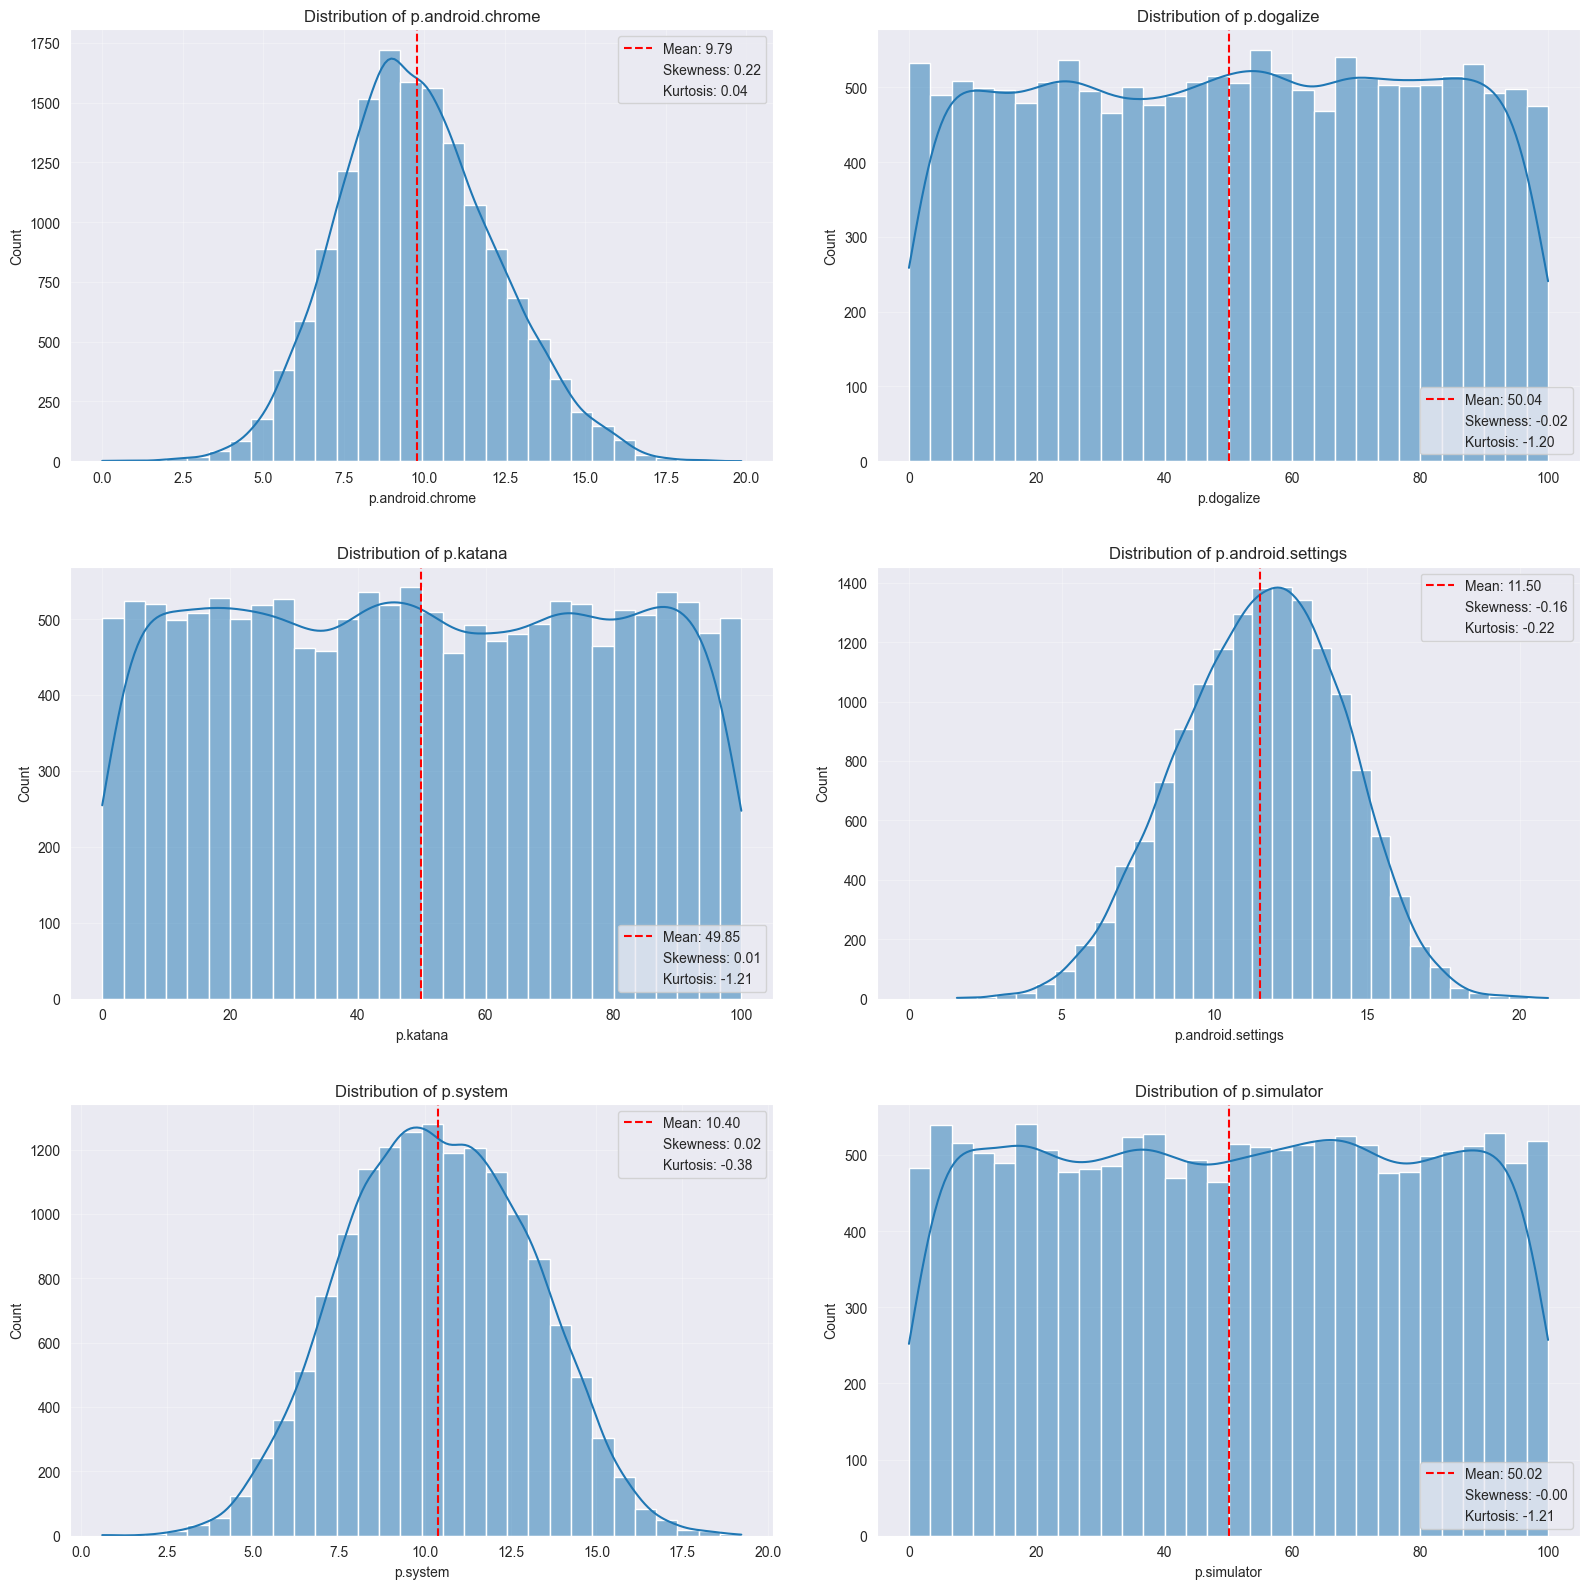

In [218]:
fig, axes = plt.subplots(3, 2, figsize=(16, 16))

for i in range(len(all_data_processes)):
    sns.histplot(all_data_processes[i], bins=30, kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].axvline(all_means_processes[i], color="r", linestyle="--", label=f"Mean: {all_means_processes[i]:.2f}")
    axes[i // 2, i % 2].axvline(linestyle="", label=f"Skewness: {shape_df.loc[all_str_processes[i]]['skew']:.2f}")
    axes[i // 2, i % 2].axvline(linestyle="", label=f"Kurtosis: {shape_df.loc[all_str_processes[i]]['kurtosis']:.2f}")
    axes[i // 2, i % 2].set_title(f"Distribution of {all_str_processes[i]}")
    axes[i // 2, i % 2].legend()
    axes[i // 2, i % 2].grid(True, alpha=0.3)

plt.tight_layout(w_pad=3, h_pad=3)
plt.show()

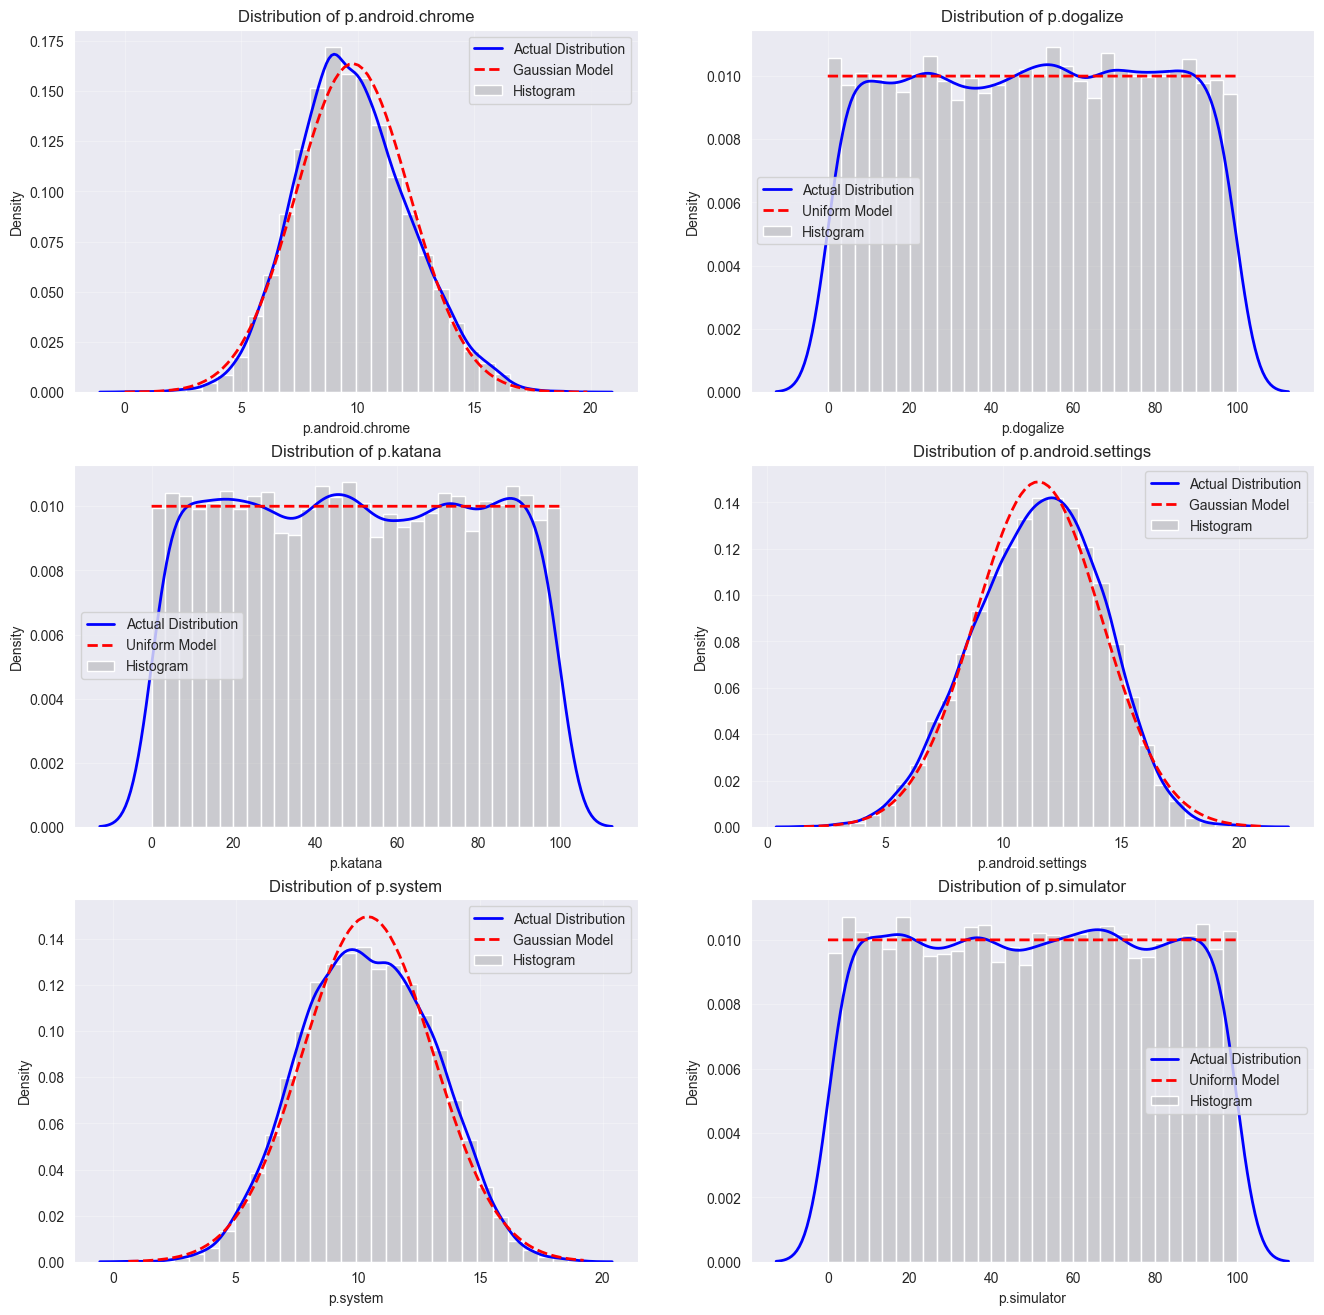

In [219]:
_, axes = plt.subplots(3, 2, figsize=(16, 16))

gaussian_models = [chrome_data, settings_data, system_data]

for i in range(len(all_data_processes)):
    sns.histplot(
    data=all_data_processes[i], bins=30, stat="density", alpha=0.3, color="gray", label="Histogram", ax=axes[i // 2, i % 2]
                )
    sns.kdeplot(data=all_data_processes[i], color="blue", label="Actual Distribution", linewidth=2, ax=axes[i // 2, i % 2])
    
    if any(all_data_processes[i] is model for model in gaussian_models):
        x = np.linspace(all_data_processes[i].min(), all_data_processes[i].max(), 100)
        gaussian = stats.norm.pdf(x, all_means_processes[i], all_std_processes[i])
        axes[i // 2, i % 2].plot(x, gaussian, color="red", linestyle="--", label="Gaussian Model", linewidth=2)
        
    
    else:
        a = all_data_processes[i].min()
        b = all_data_processes[i].max()
        x = np.linspace(a, b, all_data_processes[i].size)
        uniform_dist = stats.uniform(loc=a, scale=b - a)
        axes[i // 2, i % 2].plot(x, uniform_dist.pdf(x), color="red", linestyle="--", label="Uniform Model", linewidth=2)
        
    axes[i // 2, i % 2].set_title(f"Distribution of {all_str_processes[i]}")
    axes[i // 2, i % 2].legend()
    axes[i // 2, i % 2].grid(True, alpha=0.3)

### Boxplots


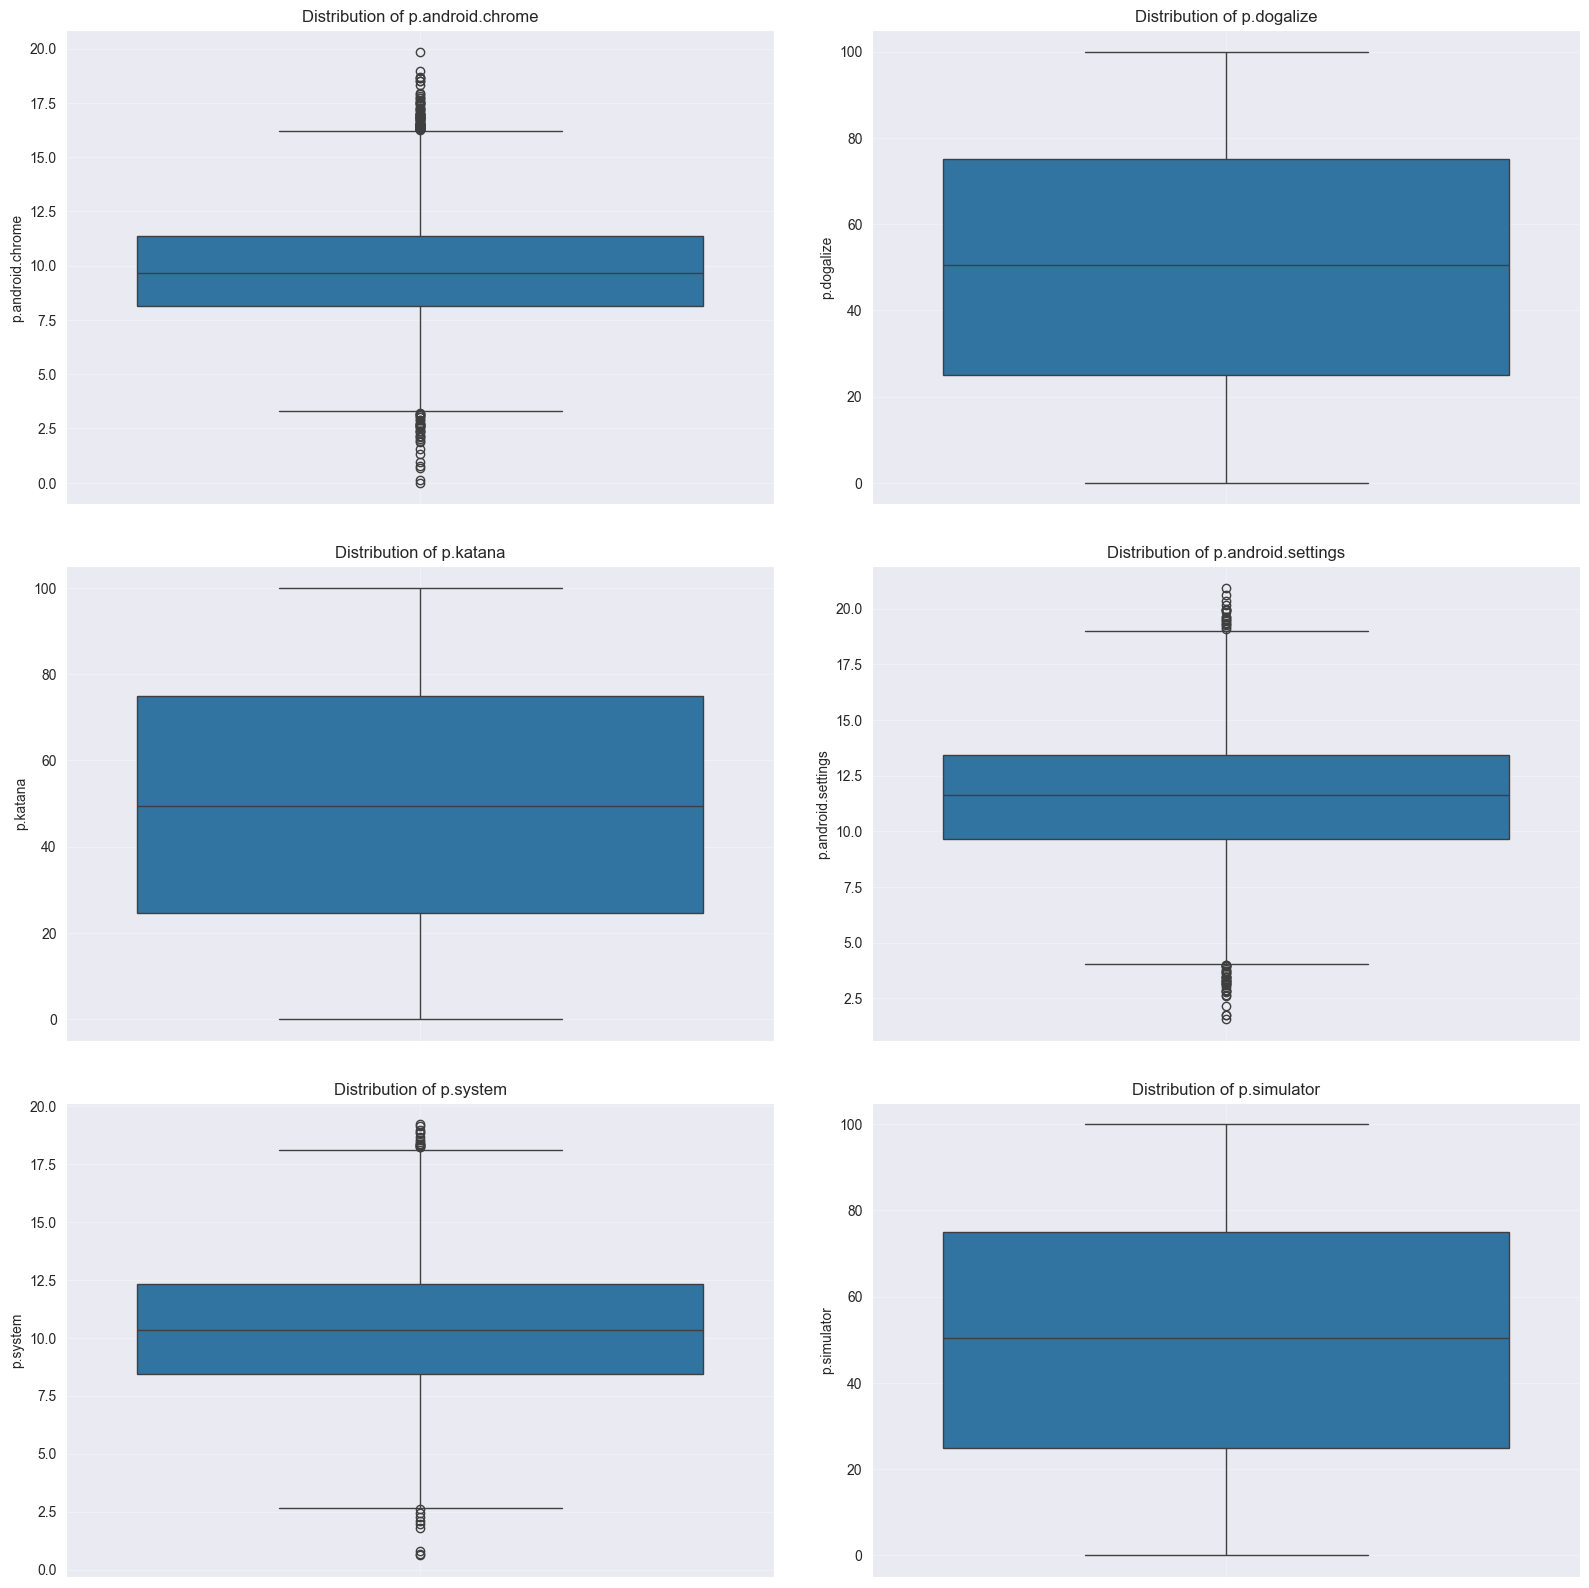

In [220]:
_, axes = plt.subplots(3, 2, figsize=(16, 16))

for i in range(len(all_data_processes)):
    sns.boxplot(all_data_processes[i], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Distribution of {all_str_processes[i]}")
    axes[i // 2, i % 2].grid(True, alpha=0.3)
    

plt.tight_layout(w_pad=3, h_pad=3)
plt.show()

### Q-Q plots


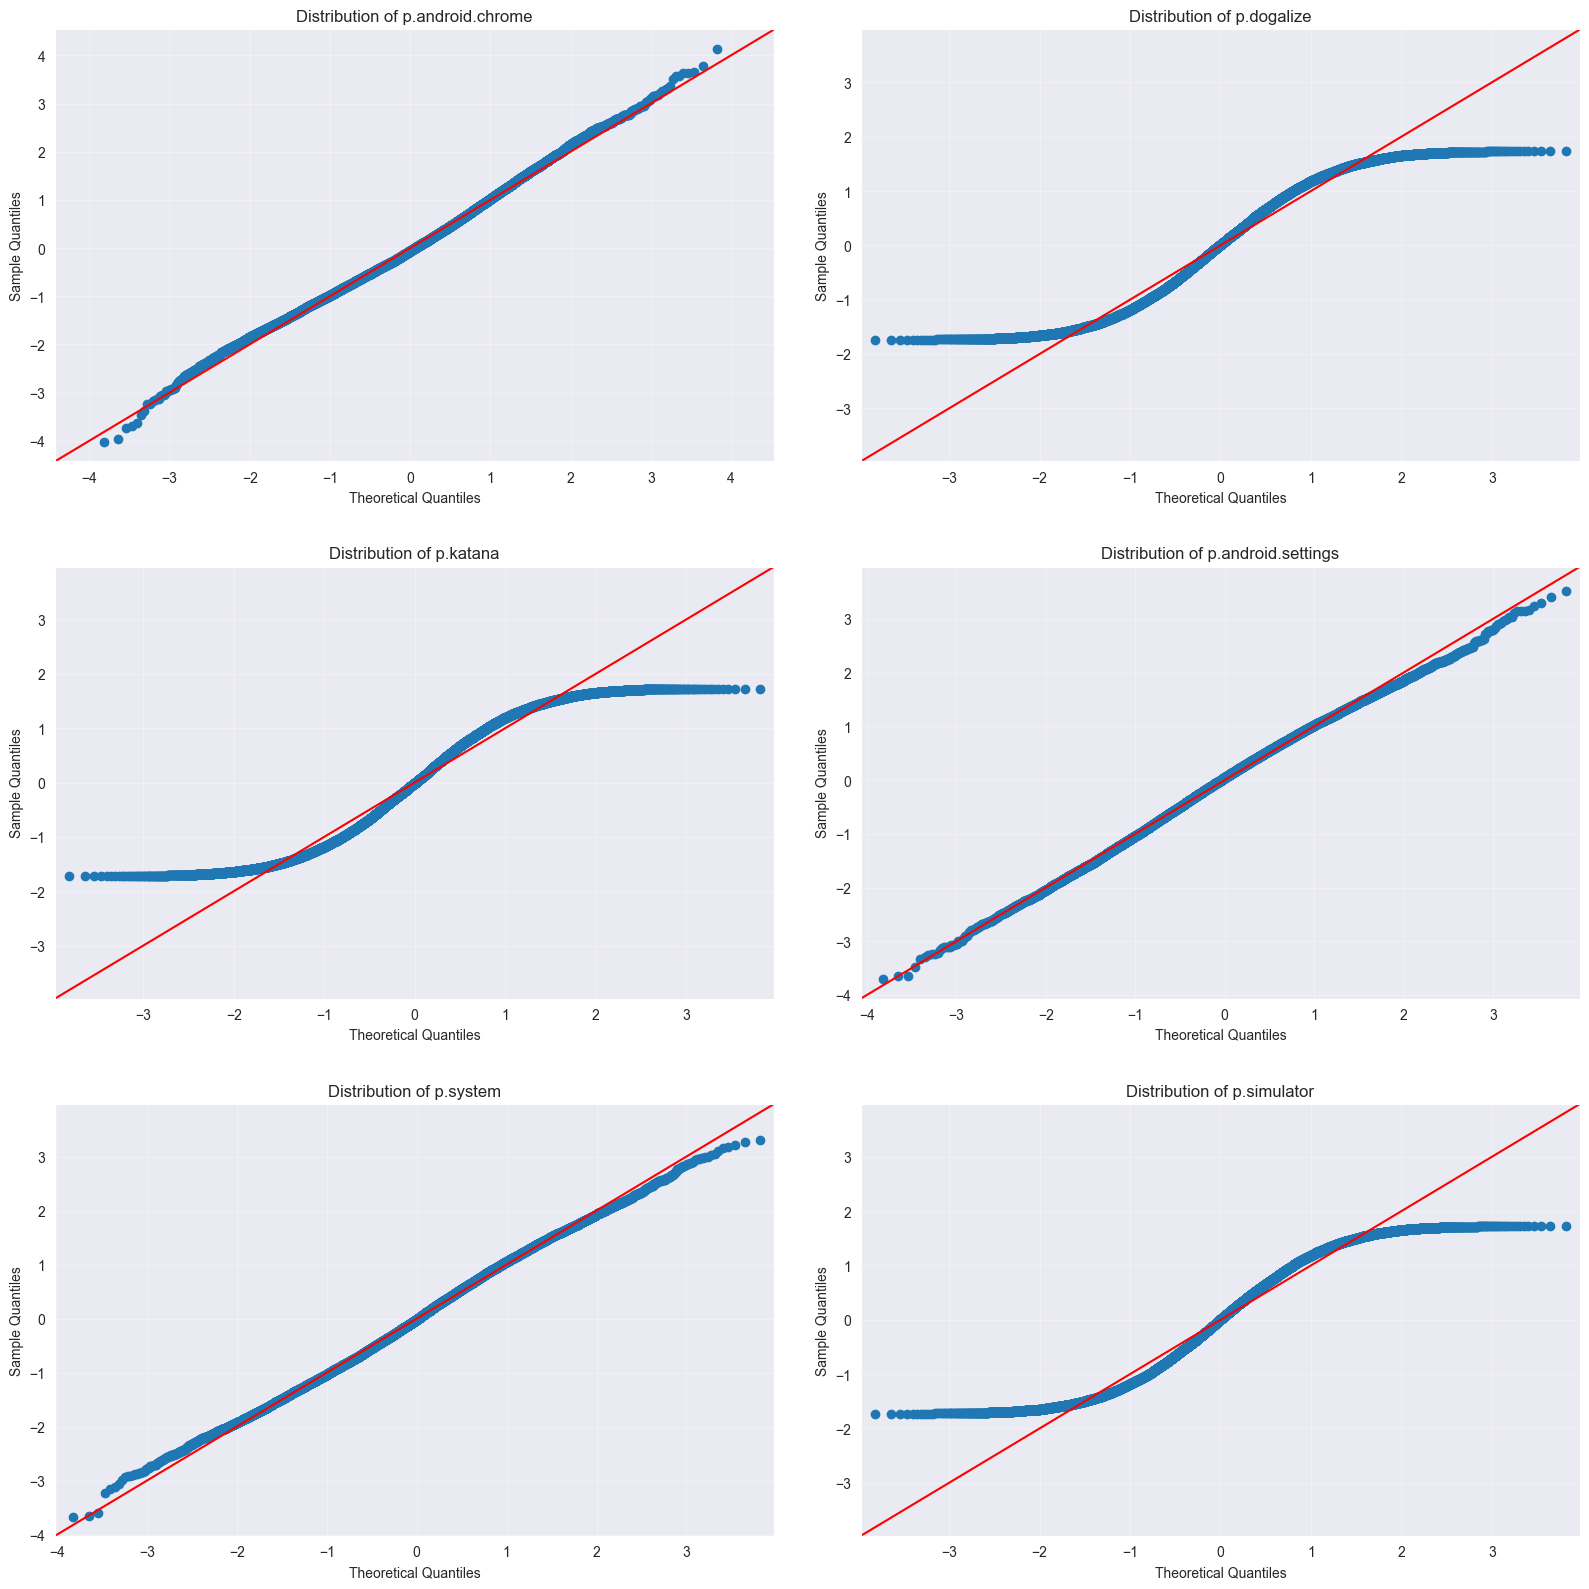

In [221]:
_, axes = plt.subplots(3, 2, figsize=(16, 16))


for i in range(len(all_data_processes)):
    sm.qqplot(all_data_processes[i], fit=True, line="45", ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Distribution of {all_str_processes[i]}")
    axes[i // 2, i % 2].grid(True, alpha=0.3)


plt.tight_layout(w_pad=3, h_pad=3)
plt.show()